<a href="https://colab.research.google.com/github/sameersat96/Netflix-movies-and-TV-shows-clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

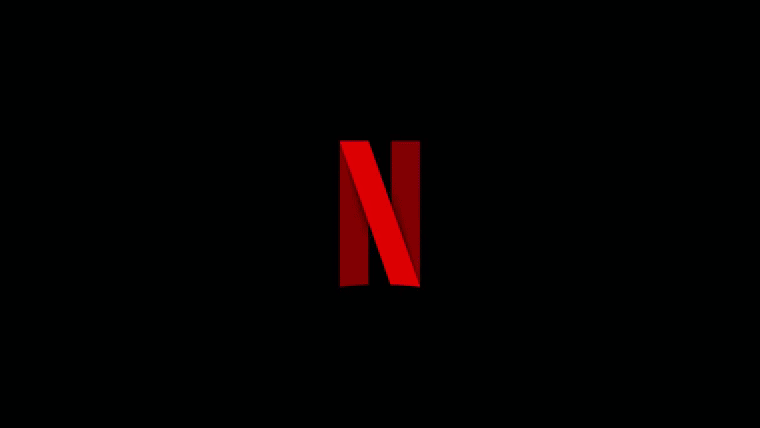

# **Problem Statement**


---





Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **IMPORTING THE NECESSARY LIBRARIES**


---







In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
%matplotlib inline
import seaborn as sns
import math
import scipy.stats as stat
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10
#necessary imports for plotly and map
import os
import re
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from keras.preprocessing.text import Tokenizer

from sklearn import preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


## **IMPORTING THE DATASET'S INTO OUR COLLAB NOTEBOOK**

In [2]:
# Mounting drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Let's read our dataset
netflix_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/Netflix movies and TV shows clustering - Sameer Satpute/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

## **DATA EXPLORATION**


---






In [4]:
#First look of the dataset
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
#Last 5 values of the dataset
netflix_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

## Checking Shape of our dataset and features we have

In [6]:
# Shape of the dataset.
netflix_df.shape

(7787, 12)

We have a dataset of 7787 rows and 12 columns.

In [7]:
#Columns present in the dataset
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Checking Datatype 

In [8]:
#Datatypes of each feature in the dataset
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object



*  date_added is having datatype as object we need to convert it to date-time.





In [9]:
#Getting the concise summary of data
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
# Getting some basic statistical information
netflix_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [11]:
#Unique values present in each feature
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

# **Conclusion:**


*   We have a dataset of 7787 rows and 12 columns.
*   We need to change the datatype of date_added column and we can also see there are some comma separated values we need to clean that columns.
*   We can see there are some null values present in our dataset we will first treat those null values.





# **Exploratory Data Analysis**


---


## **Null Values Treatment**

In [12]:
# Count of null or missing values.
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

*  We can clearly see there are null alues present in director, cast, country, date_added and rating.
*  We have 30% of values as null in director so instead of dropping we can fill those values with 'No Director' same for cast and country.
*  We can drop null values from date_added and rating as there are not much null values.

In [13]:
# null values treatment
netflix_df['country'] = netflix_df['country'].fillna('No Country')
netflix_df['director'] = netflix_df['director'].fillna('No Director')
netflix_df['cast'] = netflix_df['cast'].fillna('No Cast')
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [14]:
# Count of null or missing values.
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Voila!!! We can see that there are no null values present in our dataset now. 

## **Duplicate Values Treatment**

In [15]:
#Counting number of duplicate values
netflix_df.duplicated().sum()

0

*  We don't have any duplicate values present.

Rating: It appears like there is nothing wrong with 'rating'. But, to the viewer - ratings like 'TV-MA' or 'PG-13' means nothing. We just know that the rating means "for specific audiance". So, we want to conduct a research to understand all the ratings, and then change the text into a more readable, appropriate text

In [16]:
print('TV Shows Ratings:',netflix_df[netflix_df['type'] == 'TV Show']['rating'].unique(),'\n')
print('Movies Ratings:',netflix_df[netflix_df['type'] == 'Movie']['rating'].unique())

TV Shows Ratings: ['TV-MA' 'TV-14' 'TV-PG' 'TV-Y7' 'TV-G' 'TV-Y' 'NR' 'R' 'TV-Y7-FV'] 

Movies Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'PG' 'G' 'TV-Y7'
 'NC-17' 'TV-Y7-FV' 'UR']


Processing the 'rating' column'. Here we have 2 challenges, because not only we need to interpert what every rating means, we also need to change it to a more understandable text. Our course of action will be:
*  Listing all the unique ratings for movies and TV shows.
*  Check for similarities / differences between TV and movie ratings.
*  Interpert what every rating means.
*  Decide on new rating categories and change accordingly

We decided to categorize the different ratings based on CONTENT (and not AGE). From our understanding, there are 6 content categories in which we want to divide the ratings by:

1.  Kids
2.  All Ages
3.  Teens
4.  Brief Violence/Nude
5.  Adult Content
6.  Unrated

# **Classifying the 'rating' feature into three categories. (Kids, Teenagers, Adults)**
In Kids:

*  TV-Y 
*  TV-Y7 
*  TV-Y7-FV 
*  G 
*  TV-G  
*  PG 
*  TV-PG 

In Teenagers:

*  PG-13 
*  TV-14 

In Adults:

* TV-MA 
* R
* NC-17
* NR
* UR


In [17]:
#Replace the rating with 3 categories
rating_cleaning = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['ratings_cat'] = netflix_df['rating'].replace(to_replace = rating_cleaning)
netflix_df['ratings_cat'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

*   Using the target_ages column we can easily make out the intended audience for a particular

Next task is to replace all NaN values with "Not Available"

In [18]:
netflix_df = netflix_df.fillna("Not Available")

### **"Listed In":**  We did notice something odd in listed_in column. Values like "International TV Show" or "International Movie" are not genres. These are types of content. So, let's split all the "International" to a different column, and remove them from "listed_in

In [19]:
netflix_df['international'] = netflix_df['listed_in'].apply(lambda x: "International" in x) 

netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: x.split(", ")) 

netflix_df[(netflix_df['type'] == 'TV Show') & (netflix_df['international'] == True)]['listed_in'].apply(lambda x: x.remove("International TV Shows"))

netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['international'] == True)]['listed_in'].apply(lambda x: x.remove("International Movies"))

netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: ", ".join(x))

### **Let's Fix the data-types of the features**

In [20]:
#type should be a category
netflix_df['type'] = pd.Categorical(netflix_df['type'])

# ratings_cat is another category (4 classes)
netflix_df['ratings_cat'] = pd.Categorical(netflix_df['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])


## **Handling Comma-Separated Values**

We require all comma-separated values are placed in the correct order/form

In [21]:
comma_columns = ['cast','director','country','listed_in']

for column in comma_columns:
    if len(netflix_df[netflix_df[column].str.startswith(",")]) > 0:
        print("In column:",column,"there are bad entries that BEGIN with a comma")
    if len(netflix_df[netflix_df[column].str.endswith(",")]) > 0:
        print("In column:",column,"there are bad entries that END with a comma")
    if len(netflix_df[netflix_df[column] == '']) > 0:
        print("In column:",column,"there are bad entries that CONTAIN empty values ''")


In column: country there are bad entries that END with a comma
In column: listed_in there are bad entries that CONTAIN empty values ''


There are bad entries so fixing them.

In [22]:
netflix_df[netflix_df['country'].str.endswith(",")]

show_id   type          title               director  \
1402   s1403  Movie    City of Joy        Madeleine Gavin   
2315   s2316  Movie          Funan               Denis Do   
2827   s2828  Movie  Hotel Pacific        Janusz Majewski   
7433   s7434  Movie        Virunga  Orlando von Einsiedel   

                                                   cast  \
1402                                            No Cast   
2315  Bérénice Bejo, Louis Garrel, Colette Kieffer, ...   
2827  Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...   
7433                                            No Cast   

                                     country         date_added  release_year  \
1402                          United States,  September 7, 2018          2018   
2315  France, Belgium, Luxembourg, Cambodia,      July 18, 2020          2018   
2827                                 Poland,    October 1, 2019          1975   
7433                         United Kingdom,   November 7, 2014          2014   

     rating duration               listed_in  \
1402  TV-MA   77 min           Documentaries   
2315  TV-14   87 min                  Dramas   
2827  TV-MA   96 min  Classic Movies, Dramas   
7433  TV-MA  100 min           Documentaries   

                                            description ratings_cat  \
1402  Women who've been sexually brutalized in war-t...      Adults   
2315  Separated from their young son during the brut...       Teens   
2827  A motivated teen strives to rise from dishwash...      Adults   
7433  The Oscar-nominated true story of the rangers ...      Adults   

      international  
1402          False  
2315           True  
2827           True  
7433           True

In [23]:
netflix_df['country'][1402]

'United States,'

In [24]:
#correcting entries
netflix_df.loc[1402,'country'] = 'United States'
netflix_df.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
netflix_df.loc[2827,'country'] = 'Poland'
netflix_df.loc[7433,'country'] = 'United Kingdom'

Looking at empty values from genres



In [25]:
netflix_df[netflix_df['listed_in']=='']


show_id     type                                              title  \
1707   s1708    Movie                              Derren Brown: Miracle   
1729   s1730  TV Show                      Devlok with Devdutt Pattanaik   
2035   s2036  TV Show                            Eurovision Song Contest   
3494   s3495    Movie                                    La Gran Ilusión   
4341   s4342    Movie  My Next Guest with David Letterman and Shah Ru...   

           director                                          cast  \
1707    No Director                                  Derren Brown   
1729    No Director               Rasika Dugal, Devdutt Pattanaik   
2035    No Director  Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub   
3494   Antonio Díaz                                  Antonio Díaz   
4341  Michael Steed               Shah Rukh Khan, David Letterman   

             country        date_added  release_year rating  duration  \
1707  United Kingdom     June 22, 2018          2018  TV-MA    74 min   
1729           India  October 15, 2018          2017  TV-PG  1 Season   
2035      No Country     July 23, 2019          2019  TV-PG  1 Season   
3494      No Country  October 28, 2020          2016  TV-14    50 min   
4341      No Country  October 25, 2019          2019  TV-PG    61 min   

     listed_in                                        description ratings_cat  \
1707            Illusionist Derren Brown reinvents the concept...      Adults   
1729            Through chats with host Rasika Dugal, mytholog...  Older Kids   
2035            Singers from all over Europe represent their c...  Older Kids   
3494            Known as "El Mago Pop," illusionist Antonio Dí...       Teens   
4341            "King of Bollywood" Shah Rukh Khan opens up ab...  Older Kids   

      international  
1707           True  
1729           True  
2035           True  
3494           True  
4341           True

In [26]:
#filling up entries by getting idea from description
netflix_df.loc[1707,'listed_in'] = 'Sci-Fi & Fantasy'
netflix_df.loc[1729,'listed_in'] = 'Stand-Up Comedy'
netflix_df.loc[2035,'listed_in'] = 'Reality TV'
netflix_df.loc[3494,'listed_in'] = 'Sci-Fi & Fantasy'
netflix_df.loc[4341,'listed_in'] = 'Stand-Up Comedy & Talk Shows'


In [27]:
#Changng the datatype
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'])

In [28]:

netflix_df.dtypes

show_id                  object
type                   category
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                 object
listed_in                object
description              object
ratings_cat            category
international              bool
dtype: object

After Cleaning our data let's see the shape of the dataset and also see some values in dataset

In [29]:
netflix_df.shape

(7770, 14)

In [30]:
netflix_df.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%        No Director   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description ratings_cat  \
0  In a future where the elite inhabit an island ...      Adults   
1  After a devastating earthquake hits Mexico Cit...      Adults   
2  When an army recruit is found dead, his fellow...      Adults   
3  In a postapocalyptic world, rag-doll robots hi...       Teens   
4  A brilliant group of students become card-coun...       Teens   

   international  
0           True  
1           True  
2           True  
3          False  
4          False

## **Data Visualisations**

### Distribution of Movies & TV shows

In [31]:
netflix_df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [32]:

#Plotting graph for type
labels=['Movie','TV Show']
fig = px.pie(netflix_df['type'], values=netflix_df['type'].value_counts(),
            names=labels,
            color=labels, 
            color_discrete_map={'Movie':'red','TV Show':'white'},
            hole = 0.4,width=700,height=500,template= "plotly_dark")
fig.show()


* Netflix has 69% of its content as movies

* Movies are clearly more popular on Netflix than TV shows.

## **Countplot for Ratings**

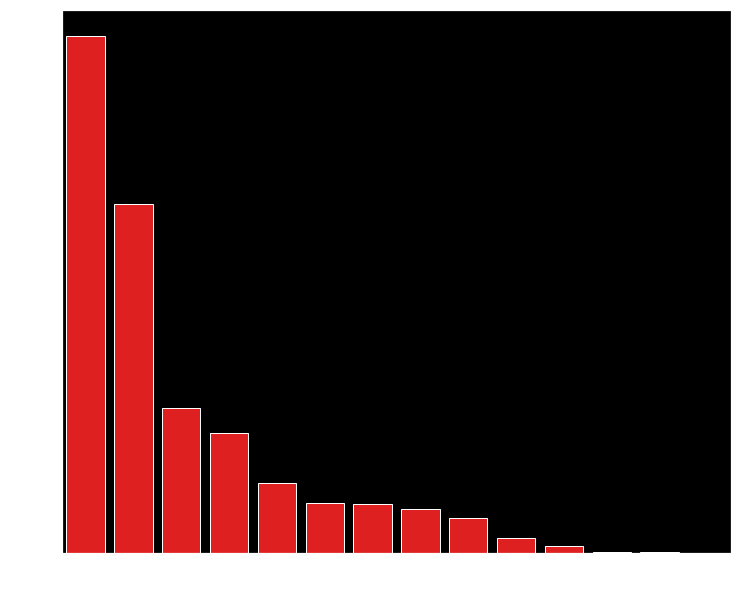

In [33]:
#Movie rating analysis 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.set(style="ticks")
plt.style.use("dark_background")
ax = sns.countplot(x="rating", data=netflix_df, palette=["red"], order=netflix_df['rating'].value_counts().index[0:15],edgecolor="white")

*  TV-MA is the most given rating then TV-14.That means most of the shows are for adults.

## **Countplot for Rating wrt Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



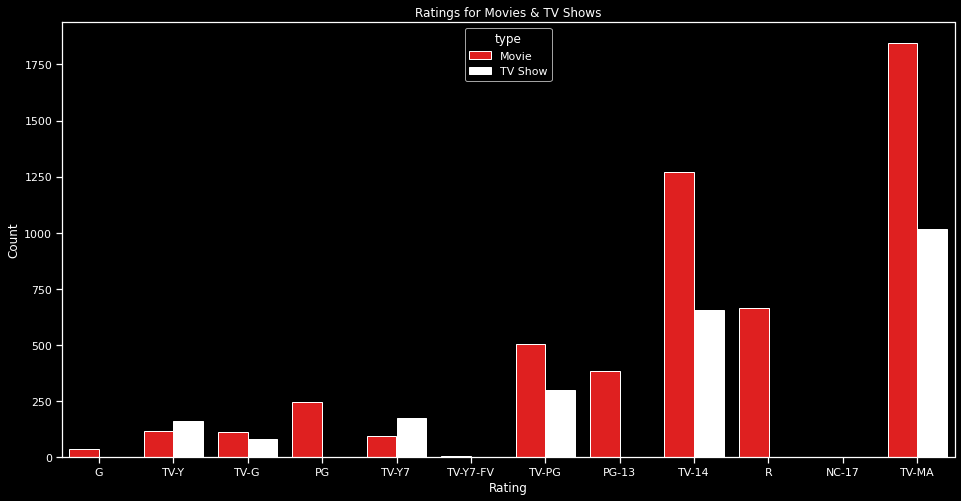

In [34]:
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,8))
plt.style.use("dark_background")
g = sns.countplot(netflix_df.rating, hue=netflix_df.type, order=order, palette=["red","white"]);
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

* Again TV-MA and TV-14 are the most rated shows in that as well movies are having greater numner of these rating than TV Shows

## **Count plot for releases over years**

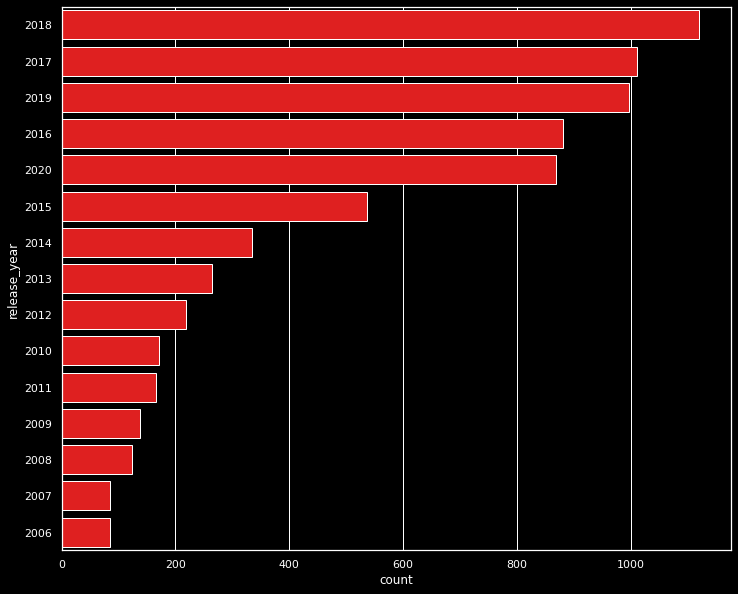

In [35]:
# Year wise analysis 
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
plt.style.use('dark_background')
ax = sns.countplot(y="release_year", data=netflix_df, palette=['red'], order=netflix_df['release_year'].value_counts().index[0:15],edgecolor="white")

*  We can see after 2014 there is growth in the amount of content added.

# **Top 10 Genres for Movies/Shows on Netflix**

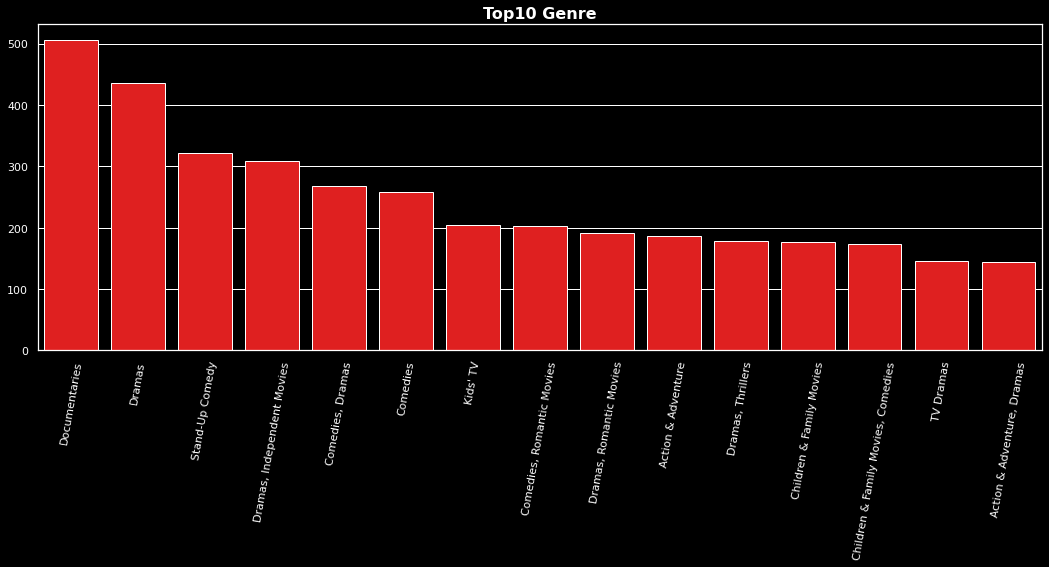

In [36]:
# Top 10 Genre 
plt.figure(figsize=(18,6))
plt.style.use("dark_background")
sns.barplot(x = netflix_df["listed_in"].value_counts().head(15).index,
            y = netflix_df["listed_in"].value_counts().head(15).values,palette=["red"],edgecolor = "white")
plt.xticks(rotation=80)
plt.title("Top10 Genre",size='16',fontweight="bold")
plt.show()

*  Documentaries and Dramas are the most watched Genres.

## **Top 20 Actors with most number of movies/shows on Netflix**:

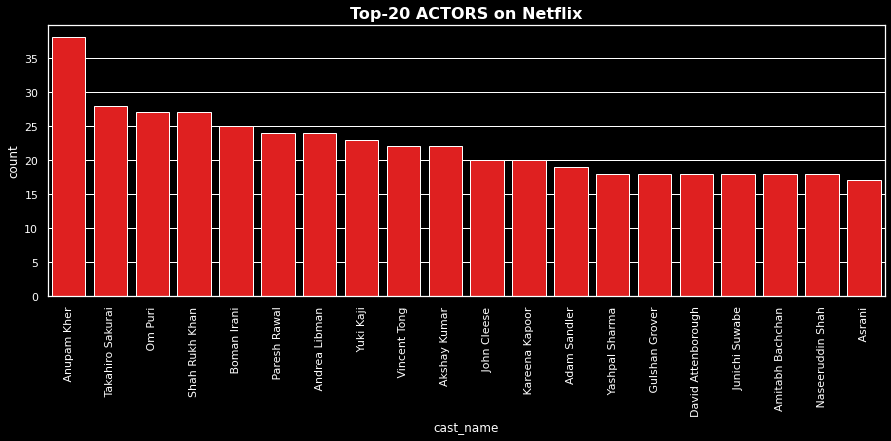

In [37]:
# Top 20 actors netflix
netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
plt.style.use("dark_background")
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette=["red"],edgecolor="white")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

*  We can see Anupam Kher, Takahiro Sakurai, Om Puri, Shah Rukh Khan, Boman Irani are among the top 5 actors worked on shows/movies on Netflix.
*  Majority of Netflix movies are having Indian actors.In this list, we can see that the most popular actors on Netflix based on the number of titles are international as well

## **Top 20 Directors with most number of movies/shows on Netflix**:

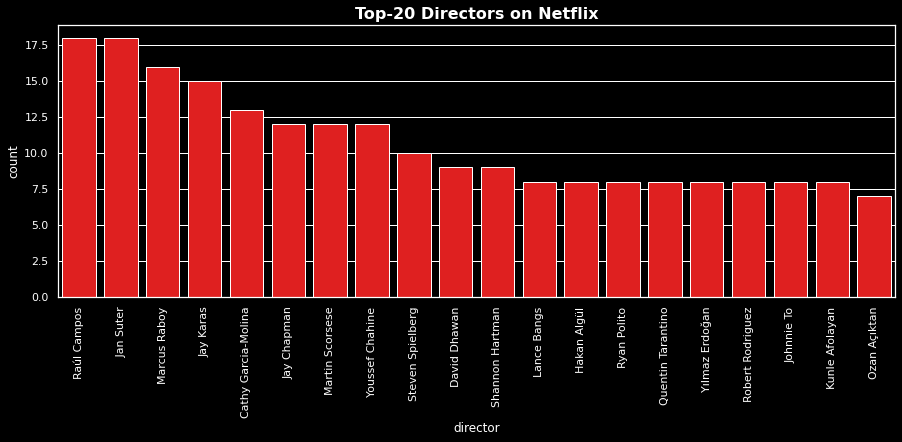

In [38]:
# Top 20 director netflix
netflix_df['director'] = netflix_df['director'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['director']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'director', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
plt.style.use("dark_background")
sns.barplot(x='director',y='count',data=df_cast_count,palette=["red"],edgecolor="white")
plt.title("Top-20 Directors on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

*  Here we can see the Raul Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina are the top 5 directors.

## **Netflix Movie Duration Distribution**

In [39]:
netflix_df['duration']=netflix_df['duration'].str.replace('Season','')
netflix_df['duration']=netflix_df['duration'].str.replace('s','')
netflix_df['duration']=netflix_df['duration'].str.replace('min','')

netflix_df['duration']=netflix_df['duration'].astype(str).astype(int)
netflix_df['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



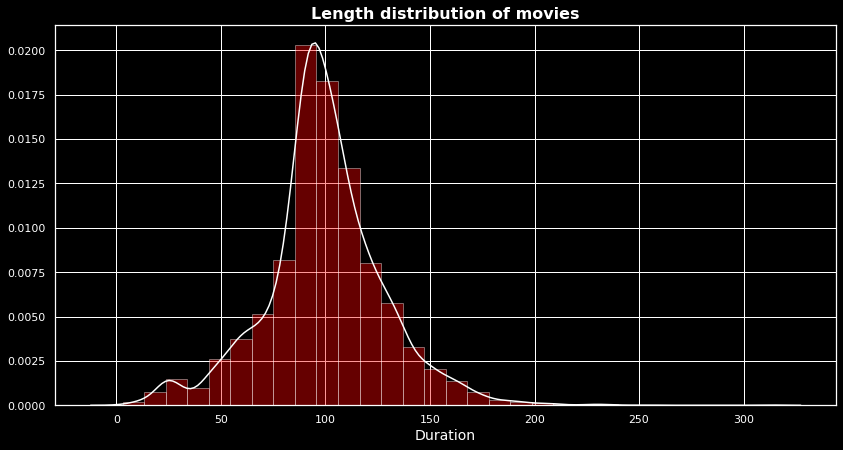

In [40]:
# Length distribution of movies
movie_df = netflix_df[netflix_df['type']=='Movie']

plt.figure(figsize=(14, 7))
plt.style.use("dark_background")
sns.distplot(movie_df['duration'], bins=30,color='red',kde_kws={"color":"white"}).set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()

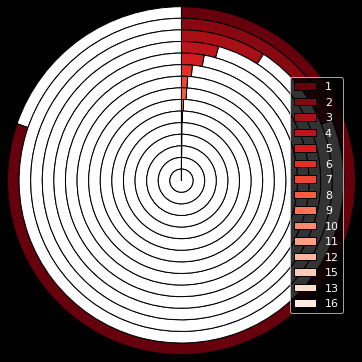

In [41]:
# Season-wise distribution of tv shows
tv_df = netflix_df[netflix_df['type']=='TV Show']
tv_df['duration'].value_counts()
tv=tv_df['duration'].value_counts().T.reset_index()
labels = tv['index']
data = tv['duration']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)
#radius of donut chart
r = 2
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.Reds_r(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "black")
plt.style.use("dark_background")
plt.legend()
plt.show()

*  Most content are about 70 to 120 min duration for movies
*  Most of the shows are 1 to 2 seasons long.

## **Country wise Distribution**

In [42]:
# all country df
all_countries = netflix_df.groupby(['country','type']).count()['show_id'].reset_index()
all_countries.head()

country     type  show_id
0                                          Argentina    Movie       34
1                                          Argentina  TV Show       16
2  Argentina, Brazil, France, Poland, Germany, De...    Movie        1
3  Argentina, Brazil, France, Poland, Germany, De...  TV Show        0
4                                   Argentina, Chile    Movie        1

In [43]:
#country wise content for top countries
country_count = {}
for i in range(len(all_countries)):
    l = all_countries['country'][i].split(', ')
    for x in l:
        x = re.sub('[^A-Za-z0-9 ]+', '', x)
        if x not in country_count.keys():
            country_count[x] = all_countries['show_id'][i]
        else:
            country_count[x] += all_countries['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count']) 

d = country_df.sort_values(by=['count'], ascending=False).head(10)
# .plot.bar(x='country',y='count',edgecolor='black')
fig = px.bar(d, x='country',y='count',template= "plotly_dark")
fig.update_traces(marker_color='red', marker_line_color='white',marker_line_width=2, opacity=1)
fig.update_layout(title='Content produced country wise')
fig.show()
top_30 = country_df.sort_values(by=['count'], ascending=False)['country'].head(30)

*  United States and India has the most number of content.

In [44]:
#total content per country
sns.set_theme()
trace = go.Choropleth(
            locations = list(country_count.keys()),
            locationmode='country names',
            z = list(country_count.values()),
            text = country_df['country'],
#             autocolorscale =True,
            reversescale = False,
            zauto = True,
            colorscale = 'RdBu',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total content per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
#         projection = dict(
#             type = 'natural earth'
#         )
    )
)

fig = go.Figure(data=data, layout=layout)

fig.show()

## **Country Wise Trend Analysis**
*  country vs listed_in
*  country vs type
*  country vs top directors
*  country vs top cast

### Country VS Listed_in

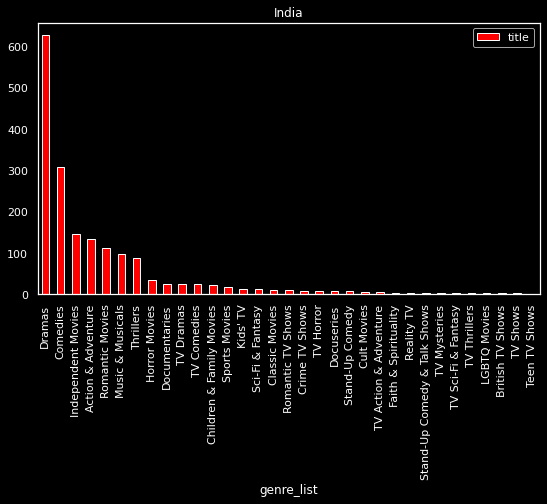

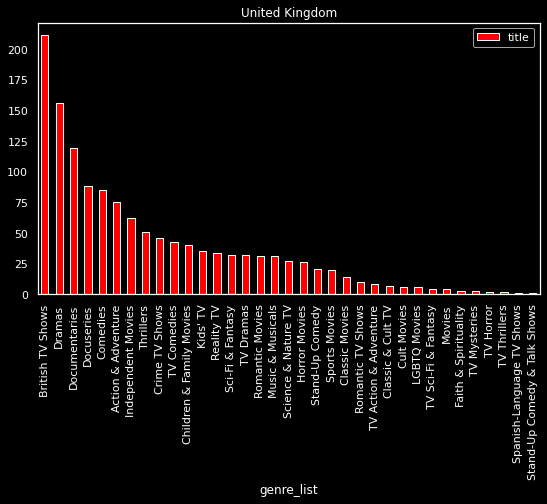

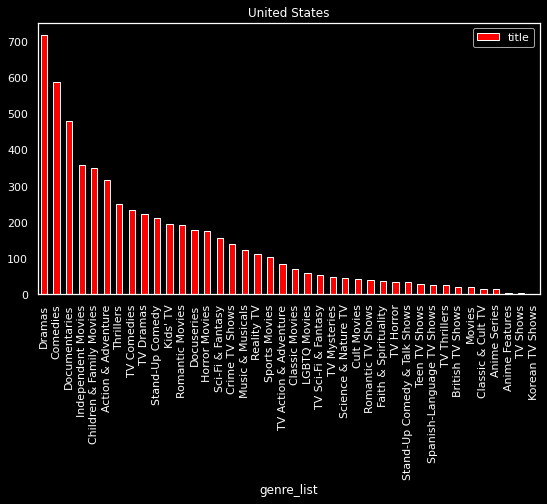

In [45]:
#genre country wise
def get_genre_country_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  df['genre_list'] = df.apply(lambda x: explode_country(x['listed_in']),axis=1)
  df = df.explode('genre_list')
  df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df_ = df.groupby(['country_list','genre_list']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    if each in ['United States','India','United Kingdom']:
      plt.style.use('dark_background')
      rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "genre_list", y="title", color="red", rot=90, figsize=(9,5),edgecolor='white')
      plt.title(f"{each}")
      plt.grid(False)

  return rating_country_df

rating_country_df = get_genre_country_trends(netflix_df)


* In every country we can see that Dramas are most popular genres then documentaries and Action and Thriller.

### Country VS Type

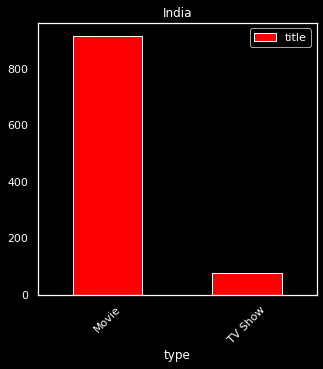

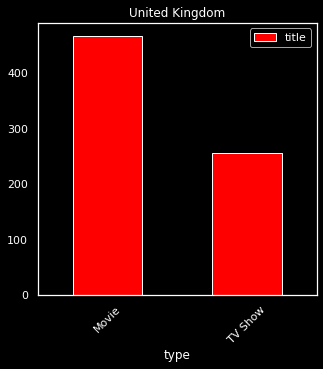

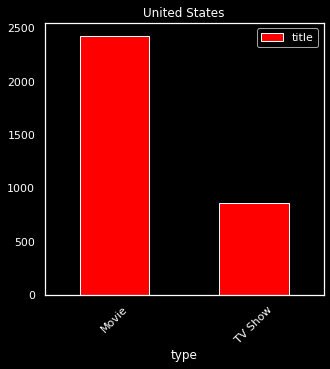

In [46]:
#get all country type preference
def get_country_type_trends(df):
  def explode_country(country):
    try:
        return country.split(", ")
    except:
        return ""
  df['country_list'] = df.apply(lambda x: explode_country(x['country']),axis=1)
  df = df.explode('country_list')
  grouped_df_ = df.groupby(['country_list','type']).agg({'title':'count'})
  grouped_df = grouped_df_.reset_index()
  grouped_df['country_list'].values
  grouped_df = grouped_df[grouped_df.country_list != '']
  rating_country_df = grouped_df.reset_index().drop("index", axis=1)
  list_of_countries = list(set(list(rating_country_df['country_list'].values)))
  for each in list_of_countries:
    if each in ['United States','India','United Kingdom']:
      plt.style.use('dark_background')
      rating_country_df[rating_country_df['country_list'] == each].sort_values("title",ascending=False).plot.bar(x = "type", y="title", color="red", rot=45, figsize=(5,5),edgecolor='white')
      plt.title(f"{each}")
      plt.grid(False)

get_country_type_trends(netflix_df)

*  We can see that every country movies are shot more than TV Shows.

### Country VS Director

In [47]:
def convertListToString(s):
  return ' '.join([str(elem) for elem in s])

netflix_df['director']=netflix_df['director'].apply(lambda x:convertListToString(x))

In [48]:
#word cloud for user rating review
def func_select_Category(category_name,category_column,column_of_choice):
  df_word_cloud = netflix_df[[category_column,column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud[category_column]==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure( figsize=(8,8), facecolor='white' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


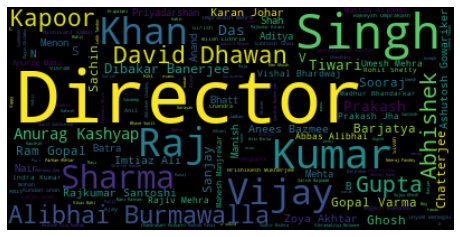

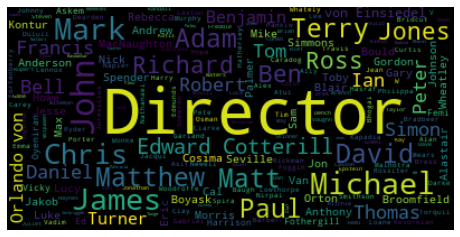

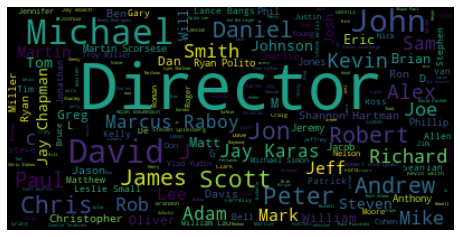

In [49]:
for i in ['India','United Kingdom','United States']:
  func_select_Category(i,'country','director')

*  For India we can see Anurag Kashyab, Dhavid Dhawan, Gopal Varma, Dibakar Banerjee and many more.
* For United Kingdom we can see Mathew, Adam, Michael, John and many more.
* For US we can see David, Marcus, Scott, Adam, Johnson and many more.

### Country VS Cast

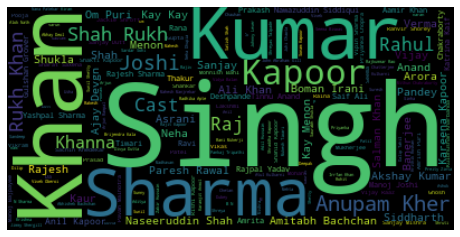

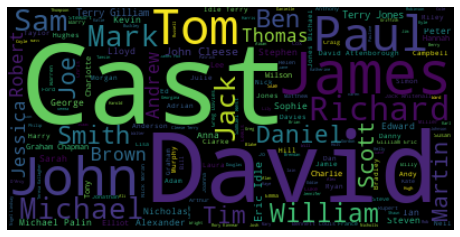

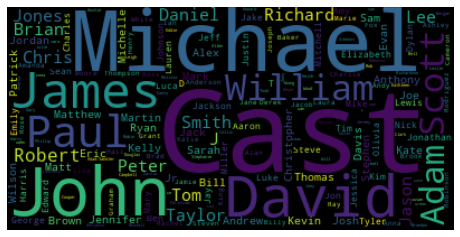

In [50]:
for i in ['India','United Kingdom','United States']:
  func_select_Category(i,'country','cast')

* In India we can see Amitabh Bachchan, Shah Rukh Khan, Naseeruddin Shah, Kareena Kapoor, Anupam Kher and many more.
* In UK we can see John, James, David, Katherine and many more.
* In US we can see Michael, Tom Adam, Scott, William, James and many more.

## **Is Netflix has increasingly focusing on TV rather than movies in recent years.?**

In [51]:
#subsetting data for visualisation
d1 = netflix_df[netflix_df["type"] == "TV Show"]
d2 = netflix_df[netflix_df["type"] == "Movie"]

col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(255, 255, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show(renderer='colab')

* From the above plot we can see that the number of movies added to netflix is higher than that of TV shows. In 2018, netflix added 734 movies and 386 TV shows. So there we cannot conclude that netflix has switched focus from movies to TV shows.

## **WordCloud for Genres**

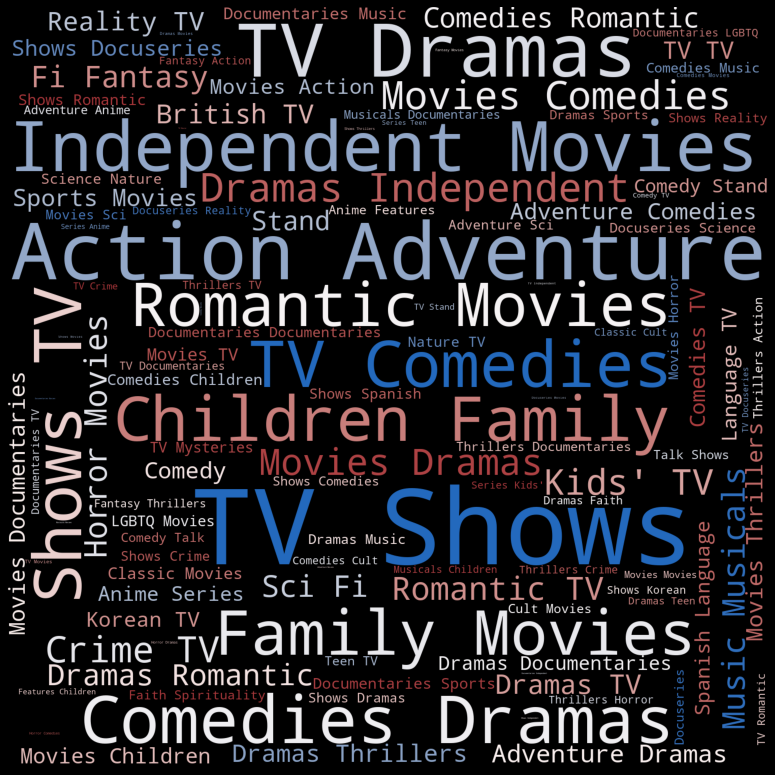

In [52]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(netflix_df['listed_in'])

plt.rcParams['figure.figsize'] = (14,14)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1500,  height = 1500, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* We can see Dramas, Romantic Movies, Action, Adventure, Family, Horror and many more.

# **TEXT CLASSIFICATION**




---




Text clarification is the process of categorizing the text into a group of words. By using NLP, text classification can automatically analyze text and then assign a set of predefined tags or categories based on its context. NLP is used for sentiment analysis, topic detection, and language detection. 

In [53]:
netflix_df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0           No Director  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784        No Director                                            Nasty C   
7785        No Director                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No Cast   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                         No Country 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating  duration  \
0             2020  TV-MA         4   
1             2016  TV-MA        93   
2             2011      R        78   
3             2009  PG-13        80   
4             2008  PG-13       123   
...            ...    ...       ...   
7782          2005  TV-MA        99   
7783          2015  TV-14       111   
7784          2019  TV-MA        44   
7785          2019  TV-PG         1   
7786          2019  TV-MA        90   

                                              listed_in  \
0                        TV Dramas, TV Sci-Fi & Fantasy   
1                                                Dramas   
2                                         Horror Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                                             Dramas   
7783                           Dramas, Music & Musicals   
7784                    Documentaries, Music & Musicals   
7785                                         Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description ratings_cat  \
0     In a future where the elite inhabit an island ...      Adults   
1     After a devastating earthquake hits Mexico Cit...      Adults   
2     When an army recruit is found dead, h

In [54]:
netflix_df.dtypes

show_id                  object
type                   category
title                    object
director                 object
cast                     object
country                  object
date_added       datetime64[ns]
release_year              int64
rating                   object
duration                  int64
listed_in                object
description              object
ratings_cat            category
international              bool
cast_name                object
country_list             object
dtype: object

## **Encoding the categorical data**


---




First, we transform column data to a list so that we can do suitable actions in columns. Then we find the unique cast, directors, and genres for these columns.

In [55]:
#Taking the primary country into account for each record and not the others
netflix_df.country = netflix_df.country.str.split(',')
netflix_df.loc[:, 'country'] = netflix_df.country.map(lambda x: x[0])

#Taking the primary director into account for each record and not the others
netflix_df.director = netflix_df.director.str.split(',')
netflix_df.loc[:, 'director'] = netflix_df.director.map(lambda x: x[0])

#Taking the primary cast member into account for each record and not the others
netflix_df.cast = netflix_df.cast.str.split(',')
netflix_df.loc[:, 'cast'] = netflix_df.cast.map(lambda x: x[0])


## Let's combine the categorical columns together and then perform text based classification on that column

In [56]:
#Combine the above featured for vectorization
netflix_df["combined_text_feat"] = netflix_df['listed_in'].astype(str) + " " + netflix_df['description'].astype(str) + " " + netflix_df['type'].astype(str) + " "  + netflix_df['country'].astype(str) + " " + netflix_df['cast'].astype(str) + " " + netflix_df['rating'].astype(str)

# **PreProcessing**


---




In any Machine learning task, cleaning or preprocessing the data is as important as model building. Text data is one of the most unstructured forms of available data and when comes to deal with Human language then it’s too complex.

## **Text Preprocessing Techniques**

* Lower Case
* Remove Punctuations
* Remove words and digits containing digits
* Remove Stopwords
* Rephrase Text
* Stemming and Lemmatization
* Remove White spaces

## **Count Vectorizer**

Machines cannot understand characters and words. So when dealing with text data we need to represent it in numbers to be understood by the machine. Countvectorizer is a method to convert text to numerical data. 

## **TF-IDF Vectorizer**

Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. It combines 2 concepts, Term Frequency (TF) and Document Frequency (DF).

In [57]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
def count_vectorizer_func(feature):
  # Create a count vectorizer object
  count_vectorizer = CountVectorizer()
  # fit the count vectorizer using the text data
  count_vectorizer.fit(netflix_df[feature])
  # Collect the vocabulary items used in the vectorizer
  dictionary = count_vectorizer.vocabulary_.items()
  return dictionary

def vocab_func(dictionary):
  vocab = [ ]
  count_of_vocab = []
  for key , value in dictionary:
    vocab.append( key )
    count_of_vocab.append( value )
  # Store the count in panadas dataframe with vocab as index
  vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
  # Sort the dataframe
  vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)
  return vocab_before_stemming


#Removing stopwords
# extracting the stopwords from nltk library
from nltk.stem import PorterStemmer

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)


def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower() 

    # Replace REPLACE_BY_SPACE_RE symbols by space in text
    inp_str = REPLACE_BY_SPACE_RE.sub(' ', inp_str) 
    
    # Remove the XXXX values
    inp_str = inp_str.replace('x', '') 
    
    # Remove white space
    inp_str = REMOVE_NUM.sub('', inp_str)

    # Remove symbols which are in BAD_SYMBOLS_RE from text
    inp_str = BAD_SYMBOLS_RE.sub('', inp_str) 

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS) 
    
    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    
    return inp_str

import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))


from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string) 
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

def join_words(x):
  return " ".join(x)


def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

def Tf_IDF_Vectorizer_func(feature):
  # Create the object of tfid vectorizer
  tfid_vectorizer = TfidfVectorizer()

  # Fit the vectorizer using the text data
  tfid_vectorizer.fit(netflix_df[feature])

  # Collect the vocabulary items used in the vectorizer
  dictionary = tfid_vectorizer.vocabulary_.items()
  return dictionary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [58]:
netflix_df['description'] = netflix_df['description'].apply(remove_punctuation)
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description ratings_cat  \
0  In a future where the elite inhabit an island ...      Adults   
1  After a devastating earthquake hits Mexico Cit...      Adults   
2  When an army recruit is found dead his fellow ...      Adults   
3  In a postapocalyptic world ragdoll robots hide...       Teens   
4  A brilliant group of students become cardcount...       Teens   

   international                                          cast_name  \
0           True  [João Miguel,  Bianca Comparato,  Michel Gomes...   
1           True  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...   
2           True  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...   
3          False  [Elijah Wood,  John C. Reilly,  Jennifer Conne...   
4          False  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...   

      country_list                                 combined_text_feat  
0         [Brazil]  TV Dramas, TV Sci-Fi & Fantasy In a future whe...  
1         [Mexico]  Dramas After a devastating earthquake hits Mex...  
2      [Singapore]  Horror Movies When an army recruit is found de...  
3  [United States]  Action & Adventure, Independent Movies, Sci-Fi...  
4  [United States]  Dramas A brilliant group of students become ca...

In [59]:
vocab_before_stemming=vocab_func(count_vectorizer_func('description'))


In [60]:
vocab_before_stemming.head()


Word  count
18955      şeref  19694
10485      ōarai  19693
12474     łukasz  19692
11196  überelite  19691
11768       über  19690

In [61]:
vocab_before_stemming.tail()

Word  count
8416  1000      4
706    100      3
7714    10      2
8060   009      1
6964   007      0

In [62]:
top15_most_ocurred_vocab = vocab_before_stemming.head(10)
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex'], dtype=object)

In [63]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([19694, 19693, 19692, 19691, 19690, 19689, 19688, 19687, 19686,
       19685])

In [64]:
def plot_top_15_occurred_word(top15_most_occurred_words,top15_most_occurred_words_count,xlim1,xlim2):
  plt.figure( figsize = ( 18,8 ))
  plt.xlim(xlim1, xlim2)
  plt.style.use("dark_background")
  plt.barh(top15_most_occurred_words,top15_most_occurred_words_count,color='red')

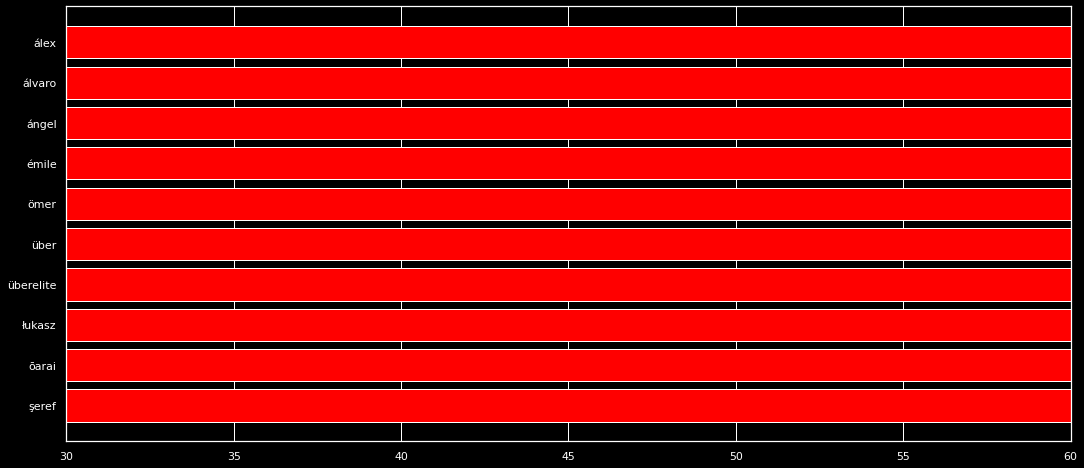

In [65]:
plot_top_15_occurred_word(top15_most_occurred_words,top15_most_occurred_words_count,30,60)

In [66]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [67]:
stemmer = PorterStemmer()
# Cleaning the text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

In [68]:
#applying the clean text funtion to the combined feature column for cleanup
netflix_df["combined_text_feat"] = netflix_df["combined_text_feat"].apply(clean_text)
netflix_df["combined_text_feat"]

0       tv drama tv scifi fantasi futur elit inhabit i...
1       drama devast earthquak hit meico citi trap sur...
2       horror movi armi recruit found dead fellow sol...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama lebanon civil war depriv zozo famili he ...
7783    drama music music scrappi poor boy worm way ty...
7784    documentari music music documentari south afri...
7785    realiti tv dessert wizard adriano zumbo look n...
7786    documentari music music documentari delv mysti...
Name: combined_text_feat, Length: 7770, dtype: object

In [69]:
netflix_df['filtered'] = netflix_df['description'] + ' '+ netflix_df['listed_in']

In [70]:
netflix_df['filtered'] = netflix_df['filtered'].apply(cleaned)

In [71]:
netflix_df['filtered' ]= netflix_df['filtered'].str.lower()

In [72]:
# Create an object of stemming function
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [73]:
netflix_df['filtered_new'] = ''
for item, row in netflix_df.iterrows():
    netflix_df.at[item, 'filtered_new'] = wordfilter(row['filtered'], stop_words)
    
netflix_df['filtered_new']

0       [futur, elit, inhabit, island, paradis, far, c...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: filtered_new, Length: 7770, dtype: object

In [74]:
netflix_df['filtered_new'] = netflix_df['filtered_new'].apply(join_words)

In [75]:
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description ratings_cat  \
0  In a future where the elite inhabit an island ...      Adults   
1  After a devastating earthquake hits Mexico Cit...      Adults   
2  When an army recruit is found dead his fellow ...      Adults   
3  In a postapocalyptic world ragdoll robots hide...       Teens   
4  A brilliant group of students become cardcount...       Teens   

   international                                          cast_name  \
0           True  [João Miguel,  Bianca Comparato,  Michel Gomes...   
1           True  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...   
2           True  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...   
3          False  [Elijah Wood,  John C. Reilly,  Jennifer Conne...   
4          False  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...   

      country_list                                 combined_text_feat  \
0         [Brazil]  tv drama tv scifi fantasi futur elit inhabit i...   
1         [Mexico]  drama devast earthquak hit meico citi trap sur...   
2      [Singapore]  horror movi armi recruit found dead fellow sol...   
3  [United States]  action adventur independ movi scifi fantasi po...   
4  [United States]  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  
0  futur elit inhabit island paradis far crowd sl...  
1  devast earthquak hit mexico citi trap survivor...  
2  armi recruit found dead fellow soldier forc co...  
3  postapocalypt world ragdol robot hide fear dan...  
4  brilliant group student becom cardcount expert...

In [76]:
#Stemming for description
netflix_df['description'] = netflix_df['description'].apply( Apply_stemming )
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0                     TV Dramas, TV Sci-Fi & Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description ratings_cat  \
0  in a futur where the elit inhabit an island pa...      Adults   
1  after a devast earthquak hit mexico citi trap ...      Adults   
2  when an armi recruit is found dead his fellow ...      Adults   
3  in a postapocalypt world ragdol robot hide in ...       Teens   
4  a brilliant group of student becom cardcount e...       Teens   

   international                                          cast_name  \
0           True  [João Miguel,  Bianca Comparato,  Michel Gomes...   
1           True  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...   
2           True  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...   
3          False  [Elijah Wood,  John C. Reilly,  Jennifer Conne...   
4          False  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...   

      country_list                                 combined_text_feat  \
0         [Brazil]  tv drama tv scifi fantasi futur elit inhabit i...   
1         [Mexico]  drama devast earthquak hit meico citi trap sur...   
2      [Singapore]  horror movi armi recruit found dead fellow sol...   
3  [United States]  action adventur independ movi scifi fantasi po...   
4  [United States]  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  
0  futur elit inhabit island paradis far crowd sl...  
1  devast earthquak hit mexico citi trap survivor...  
2  armi recruit found dead fellow soldier forc co...  
3  postapocalypt world ragdol robot hide fear dan...  
4  brilliant group student becom cardcount expert...

In [77]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(netflix_df["combined_text_feat"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aamir  aamir khan  aaron  abandon  abduct  abil  aboard  abraham  absurd  \
0    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
1    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
2    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
3    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
4    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   

   abus  ...  young son  young woman  young women  younger  youth  zach  zani  \
0   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
1   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
2   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
3   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
4   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   

   zealand  zoe  zombi  
0      0.0  0.0    0.0  
1      0.0  0.0    0.0  
2      0.0  0.0    0.0  
3      0.0  0.0    0.0  
4      0.0  0.0    0.0  

[5 rows x 2782 columns]

In [78]:
vocab_func(Tf_IDF_Vectorizer_func('description'))

Word  count
13790     şeref  14320
7853      ōarai  14319
9243     łukasz  14318
8365   überelit  14317
8756       über  14316
...         ...    ...
6382       1000      4
652         100      3
5905         10      2
6132        009      1
5392        007      0

[14321 rows x 2 columns]

In [79]:
words = netflix_df.filtered_new
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=10000)
X= t_vectorizer.fit_transform(words)
X

<7770x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 127011 stored elements in Compressed Sparse Row format>

In [80]:
X.shape


(7770, 10000)

In [81]:
vocab_after_stemming=vocab_func(count_vectorizer_func('description'))


In [82]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [83]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [84]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14320, 14319, 14318, 14317, 14316, 14315, 14314, 14313, 14312,
       14311, 14310, 14309, 14308, 14307, 14306])

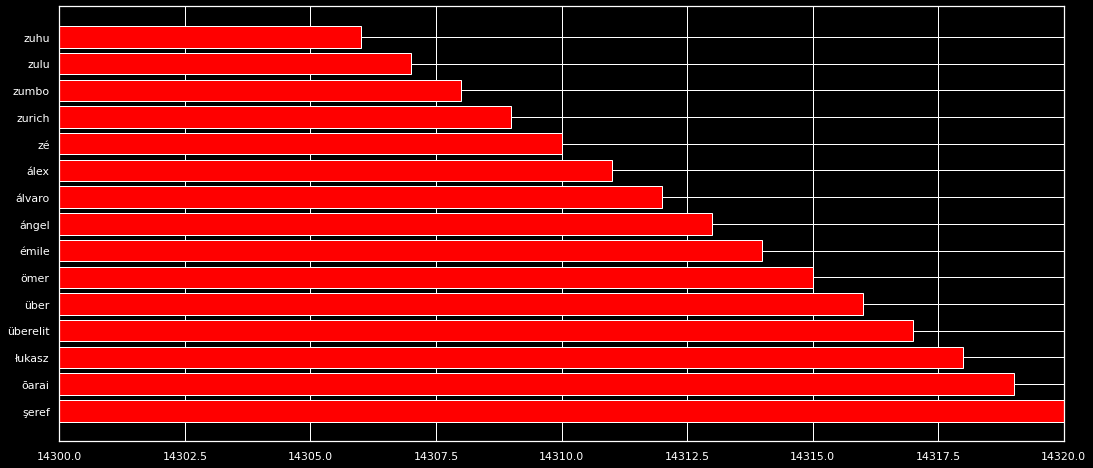

In [85]:
plot_top_15_occurred_word(top15_most_occurred_words,top15_most_occurred_words_count,14300,14320)


In [86]:
netflix_df['Length(description)'] = netflix_df['description'].apply(lambda x: len(x))

In [87]:
netflix_df.description.iloc[0]

'in a futur where the elit inhabit an island paradis far from the crowd slum you get one chanc to join the 3 save from squalor'

In [88]:
len(netflix_df.description.iloc[0])

125

In [89]:
netflix_df['listed_in'] = netflix_df['listed_in'].apply(remove_punctuation)
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0                        TV Dramas TV SciFi  Fantasy   
1                                             Dramas   
2                                      Horror Movies   
3  Action  Adventure Independent Movies SciFi  Fa...   
4                                             Dramas   

                                         description ratings_cat  \
0  in a futur where the elit inhabit an island pa...      Adults   
1  after a devast earthquak hit mexico citi trap ...      Adults   
2  when an armi recruit is found dead his fellow ...      Adults   
3  in a postapocalypt world ragdol robot hide in ...       Teens   
4  a brilliant group of student becom cardcount e...       Teens   

   international                                          cast_name  \
0           True  [João Miguel,  Bianca Comparato,  Michel Gomes...   
1           True  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...   
2           True  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...   
3          False  [Elijah Wood,  John C. Reilly,  Jennifer Conne...   
4          False  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...   

      country_list                                 combined_text_feat  \
0         [Brazil]  tv drama tv scifi fantasi futur elit inhabit i...   
1         [Mexico]  drama devast earthquak hit meico citi trap sur...   
2      [Singapore]  horror movi armi recruit found dead fellow sol...   
3  [United States]  action adventur independ movi scifi fantasi po...   
4  [United States]  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  
0  futur elit inhabit island paradis far crowd sl...                  125  
1  devast earthquak hit mexico citi trap survivor...                  123  
2  armi recruit found dead fellow soldier forc co...                  132  
3  postapocalypt world ragdol robot hide fear dan...                  126  
4  brilliant group student becom cardcount expert...                  126

In [90]:
#Remove stopwords for listed_in(genres)
netflix_df['listed_in'] = netflix_df['listed_in'].apply( remove_stopwords )
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0                         tv dramas tv scifi fantasy   
1                                             dramas   
2                                      horror movies   
3  action adventure independent movies scifi fantasy   
4                                             dramas   

                                         description ratings_cat  \
0  in a futur where the elit inhabit an island pa...      Adults   
1  after a devast earthquak hit mexico citi trap ...      Adults   
2  when an armi recruit is found dead his fellow ...      Adults   
3  in a postapocalypt world ragdol robot hide in ...       Teens   
4  a brilliant group of student becom cardcount e...       Teens   

   international                                          cast_name  \
0           True  [João Miguel,  Bianca Comparato,  Michel Gomes...   
1           True  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...   
2           True  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...   
3          False  [Elijah Wood,  John C. Reilly,  Jennifer Conne...   
4          False  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...   

      country_list                                 combined_text_feat  \
0         [Brazil]  tv drama tv scifi fantasi futur elit inhabit i...   
1         [Mexico]  drama devast earthquak hit meico citi trap sur...   
2      [Singapore]  horror movi armi recruit found dead fellow sol...   
3  [United States]  action adventur independ movi scifi fantasi po...   
4  [United States]  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  
0  futur elit inhabit island paradis far crowd sl...                  125  
1  devast earthquak hit mexico citi trap survivor...                  123  
2  armi recruit found dead fellow soldier forc co...                  132  
3  postapocalypt world ragdol robot hide fear dan...                  126  
4  brilliant group student becom cardcount expert...                  126

In [91]:
listed_in_vocab_before_stem=vocab_func(count_vectorizer_func('listed_in'))

In [92]:
listed_in_vocab_before_stem.head().append(listed_in_vocab_before_stem.tail())

Word  count
0          tv     40
10  thrillers     39
39       teen     38
38       talk     37
36    standup     36
32   children      4
23    british      3
17      anime      2
7   adventure      1
6      action      0

In [93]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [94]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [95]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26])

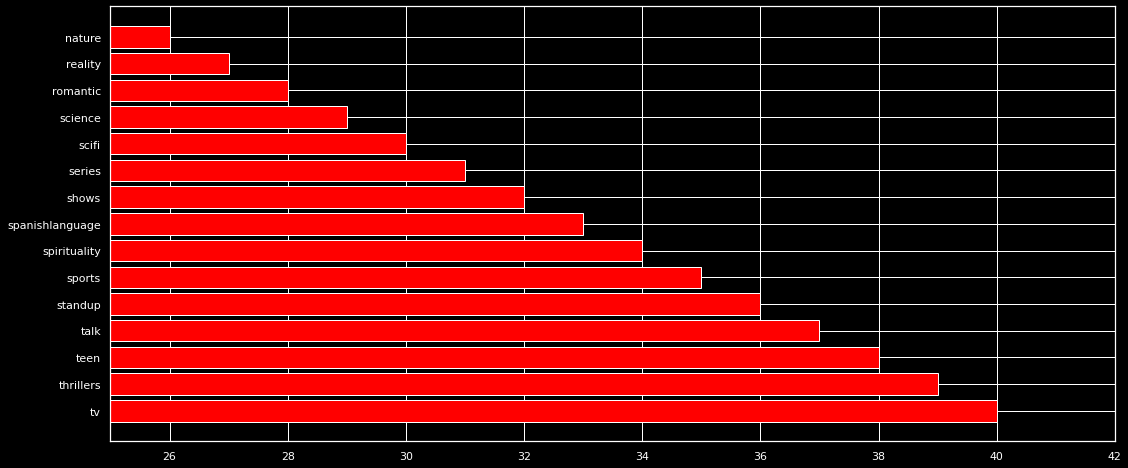

In [96]:
plot_top_15_occurred_word(top15_most_ocurred_words_listed_in,top15_most_occurred_words_in_listed_in_count,25,42)

In [97]:
#SNOWBALL STEMMER FOR ENGLISH
#Stemming for description
netflix_df['listed_in'] = netflix_df['listed_in'].apply( Apply_stemming )
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                     listed_in  \
0                    tv drama tv scifi fantasi   
1                                        drama   
2                                  horror movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description ratings_cat  \
0  in a futur where the elit inhabit an island pa...      Adults   
1  after a devast earthquak hit mexico citi trap ...      Adults   
2  when an armi recruit is found dead his fellow ...      Adults   
3  in a postapocalypt world ragdol robot hide in ...       Teens   
4  a brilliant group of student becom cardcount e...       Teens   

   international                                          cast_name  \
0           True  [João Miguel,  Bianca Comparato,  Michel Gomes...   
1           True  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...   
2           True  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...   
3          False  [Elijah Wood,  John C. Reilly,  Jennifer Conne...   
4          False  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...   

      country_list                                 combined_text_feat  \
0         [Brazil]  tv drama tv scifi fantasi futur elit inhabit i...   
1         [Mexico]  drama devast earthquak hit meico citi trap sur...   
2      [Singapore]  horror movi armi recruit found dead fellow sol...   
3  [United States]  action adventur independ movi scifi fantasi po...   
4  [United States]  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  
0  futur elit inhabit island paradis far crowd sl...                  125  
1  devast earthquak hit mexico citi trap survivor...                  123  
2  armi recruit found dead fellow soldier forc co...                  132  
3  postapocalypt world ragdol robot hide fear dan...                  126  
4  brilliant group student becom cardcount expert...                  126

In [98]:
vocab_after_stemming_listed_in=vocab_func(Tf_IDF_Vectorizer_func('listed_in'))

In [99]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [100]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [101]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24])

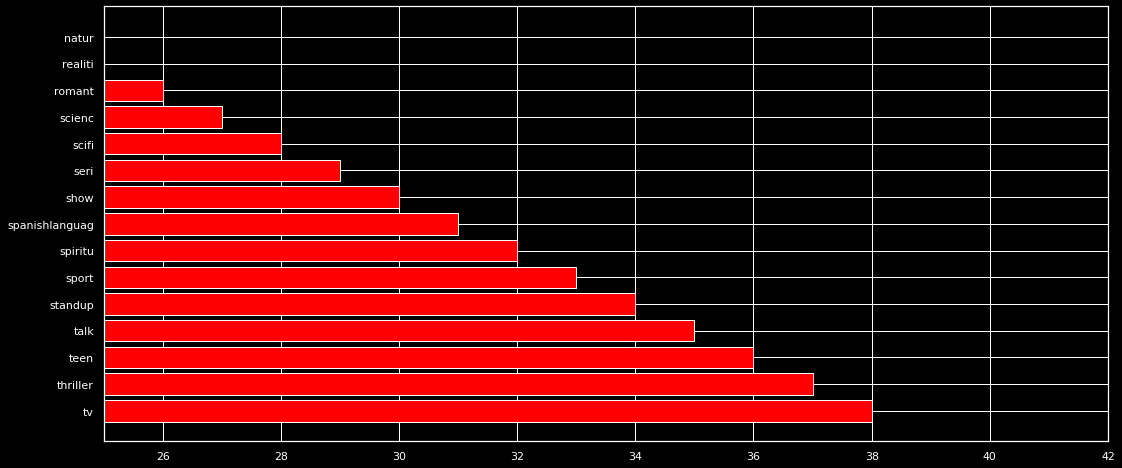

In [102]:
plot_top_15_occurred_word(top15_most_ocurred_vocab_lised_in_after_stem_word,top15_most_occurred_words_listed_in_count,25,42)

In [103]:
netflix_df['Length(listed_in)'] = netflix_df['listed_in'].apply(lambda x: len(x))
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  ...  \
0 2020-08-14          2020  TV-MA         4  ...   
1 2016-12-23          2016  TV-MA        93  ...   
2 2018-12-20          2011      R        78  ...   
3 2017-11-16          2009  PG-13        80  ...   
4 2020-01-01          2008  PG-13       123  ...   

                                         description ratings_cat  \
0  in a futur where the elit inhabit an island pa...      Adults   
1  after a devast earthquak hit mexico citi trap ...      Adults   
2  when an armi recruit is found dead his fellow ...      Adults   
3  in a postapocalypt world ragdol robot hide in ...       Teens   
4  a brilliant group of student becom cardcount e...       Teens   

  international                                          cast_name  \
0          True  [João Miguel,  Bianca Comparato,  Michel Gomes...   
1          True  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...   
2          True  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...   
3         False  [Elijah Wood,  John C. Reilly,  Jennifer Conne...   
4         False  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...   

      country_list                                 combined_text_feat  \
0         [Brazil]  tv drama tv scifi fantasi futur elit inhabit i...   
1         [Mexico]  drama devast earthquak hit meico citi trap sur...   
2      [Singapore]  horror movi armi recruit found dead fellow sol...   
3  [United States]  action adventur independ movi scifi fantasi po...   
4  [United States]  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

   Length(listed_in)  
0                 25  
1                  5  
2                 11  
3                 43  
4                  5  

[5 rows x 21 columns]

In [104]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'ratings_cat', 'international', 'cast_name', 'country_list',
       'combined_text_feat', 'filtered', 'filtered_new', 'Length(description)',
       'Length(listed_in)'],
      dtype='object')

In [105]:
netflix_df[['description', 'Length(description)', 'listed_in' ,'Length(listed_in)' ]].head()

description  Length(description)  \
0  in a futur where the elit inhabit an island pa...                  125   
1  after a devast earthquak hit mexico citi trap ...                  123   
2  when an armi recruit is found dead his fellow ...                  132   
3  in a postapocalypt world ragdol robot hide in ...                  126   
4  a brilliant group of student becom cardcount e...                  126   

                                     listed_in  Length(listed_in)  
0                    tv drama tv scifi fantasi                 25  
1                                        drama                  5  
2                                  horror movi                 11  
3  action adventur independ movi scifi fantasi                 43  
4                                        drama                  5

# **Clustering:**


---



Clustering can be considered the most important unsupervised learning problem. So, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.

A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

We have used 5 clustering algorithms:

1.Silhouette score(KMeans)

2.Elbow Method(KMeans)

3.DBSCAN

4.Dendrogram

5.Agglomerative clustering

# **KMEANS**


---





K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.bold text

# **Silhoutte Score**


---





Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [106]:
X_features_rec = netflix_df[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
X_features_rec.describe()

Length(description)  Length(listed_in)
count          7770.000000        7770.000000
mean            127.255084          18.277735
std              10.668494           9.113991
min              51.000000           4.000000
25%             123.000000          11.000000
50%             129.000000          18.000000
75%             133.000000          24.000000
max             229.000000          55.000000

In [107]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [108]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.34938940408423436
For n_clusters = 3, silhouette score is 0.37281514079850314
For n_clusters = 4, silhouette score is 0.38654443675991346
For n_clusters = 5, silhouette score is 0.3654323487801677
For n_clusters = 6, silhouette score is 0.3489085905127064
For n_clusters = 7, silhouette score is 0.3580466702151485
For n_clusters = 8, silhouette score is 0.3365033100261161
For n_clusters = 9, silhouette score is 0.3383989782990544
For n_clusters = 10, silhouette score is 0.33229966068862127
For n_clusters = 11, silhouette score is 0.33321162400120513
For n_clusters = 12, silhouette score is 0.33432198551095266
For n_clusters = 13, silhouette score is 0.3308115959592092
For n_clusters = 14, silhouette score is 0.3356279073188682
For n_clusters = 15, silhouette score is 0.33675483046746446


In [109]:
k_clusters = 45


In [110]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)

KMeans(max_iter=600, n_clusters=45, random_state=42, tol=1e-06)

In [111]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.3433770672843906


In [112]:
#Adding a seperate column for the clusters
netflix_df["Cluster Label"] = clusters
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  ... ratings_cat international  \
0 2020-08-14          2020  TV-MA         4  ...      Adults          True   
1 2016-12-23          2016  TV-MA        93  ...      Adults          True   
2 2018-12-20          2011      R        78  ...      Adults          True   
3 2017-11-16          2009  PG-13        80  ...       Teens         False   
4 2020-01-01          2008  PG-13       123  ...       Teens         False   

                                           cast_name     country_list  \
0  [João Miguel,  Bianca Comparato,  Michel Gomes...         [Brazil]   
1  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...         [Mexico]   
2  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...      [Singapore]   
3  [Elijah Wood,  John C. Reilly,  Jennifer Conne...  [United States]   
4  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...  [United States]   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

  Length(listed_in)  Cluster Label  
0                25              2  
1                 5             13  
2                11             10  
3                43             34  
4                 5             26  

[5 rows x 22 columns]

In [113]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)

n clusters  silhouette score
2            4              0.39
1            3              0.37
3            5              0.37
5            7              0.36
0            2              0.35
4            6              0.35
6            8              0.34
7            9              0.34
12          14              0.34
13          15              0.34
8           10              0.33
9           11              0.33
10          12              0.33
11          13              0.33

For n_clusters = 2 The average silhouette_score is : 0.3492523531807158
For n_clusters = 3 The average silhouette_score is : 0.3728457920542489
For n_clusters = 4 The average silhouette_score is : 0.3858164929849192
For n_clusters = 5 The average silhouette_score is : 0.36299035293935233
For n_clusters = 6 The average silhouette_score is : 0.34942375790377794
For n_clusters = 7 The average silhouette_score is : 0.3583657461754652
For n_clusters = 8 The average silhouette_score is : 0.33662745114417286
For n_clusters = 9 The average silhouette_score is : 0.33486244184592806
For n_clusters = 10 The average silhouette_score is : 0.3343927629651298
For n_clusters = 11 The average silhouette_score is : 0.32869373193182994
For n_clusters = 12 The average silhouette_score is : 0.3333163837066848
For n_clusters = 13 The average silhouette_score is : 0.33444010870818985
For n_clusters = 14 The average silhouette_score is : 0.33242224882458515
For n_clusters = 15 The average silhouette_score is 

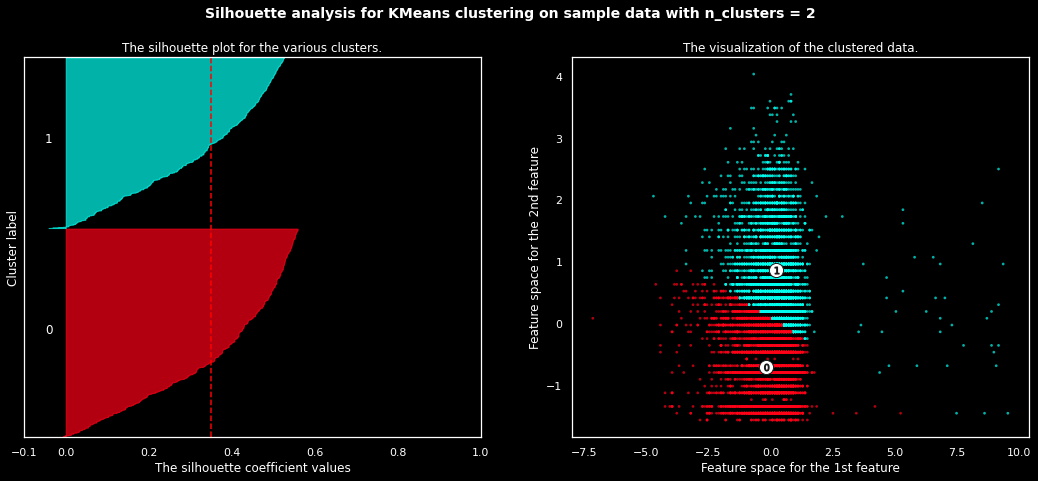

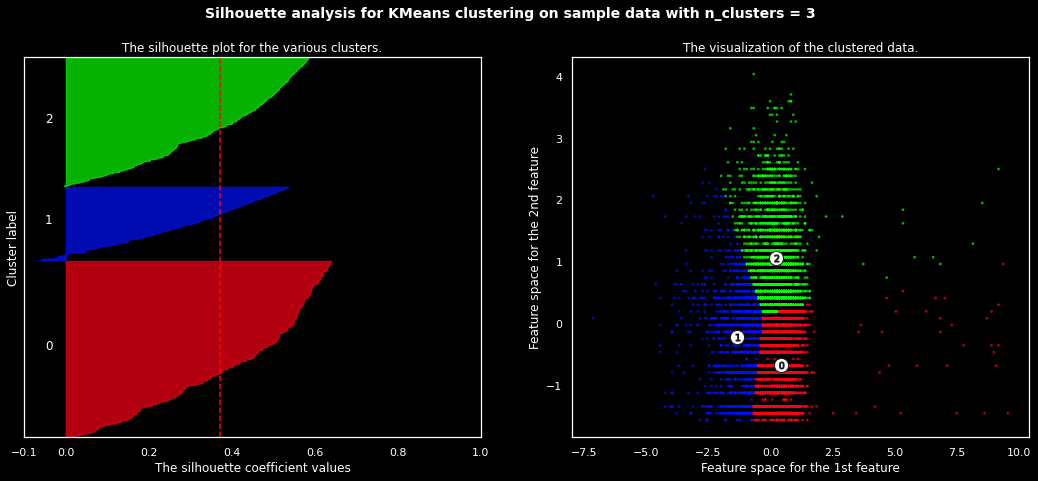

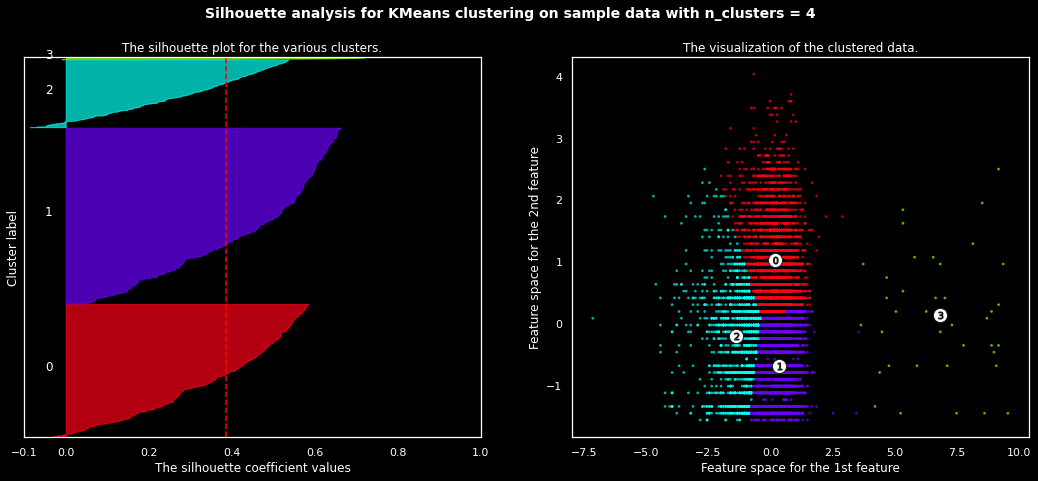

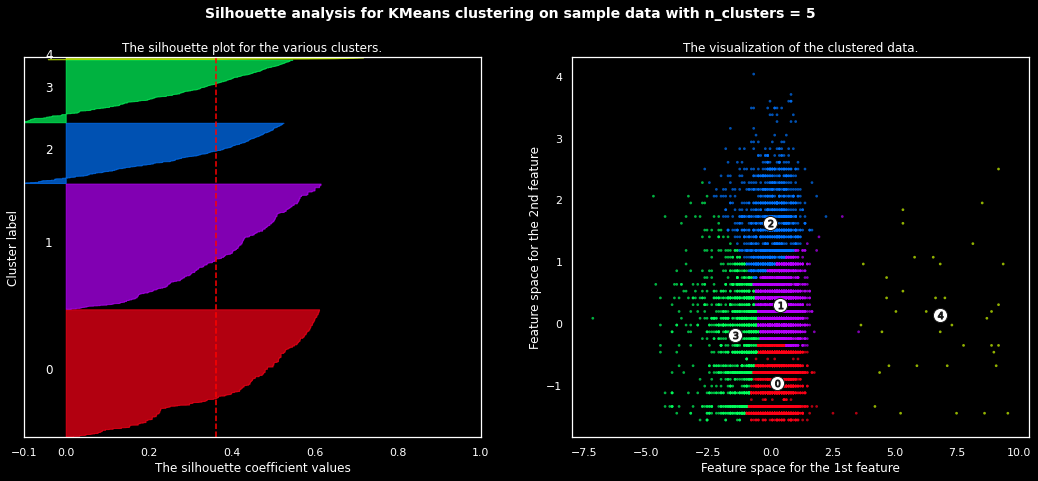

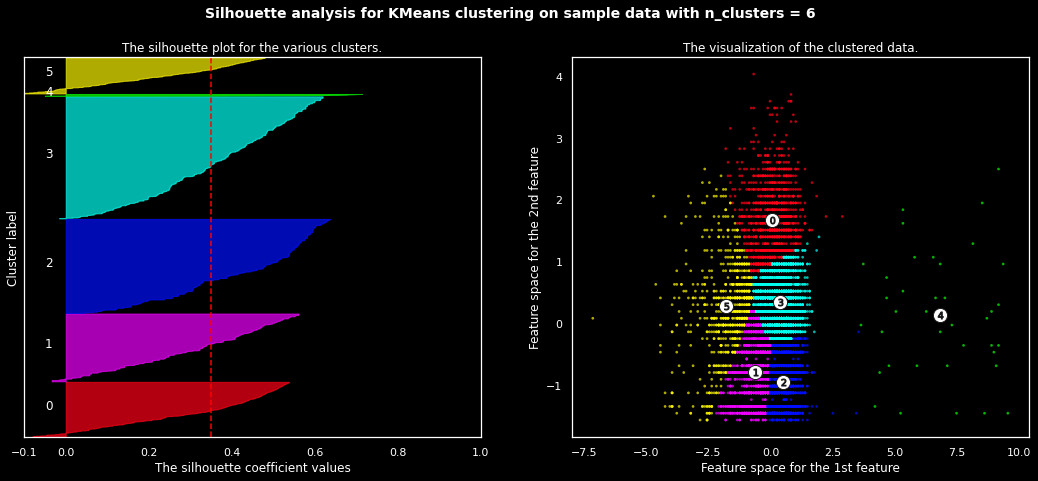

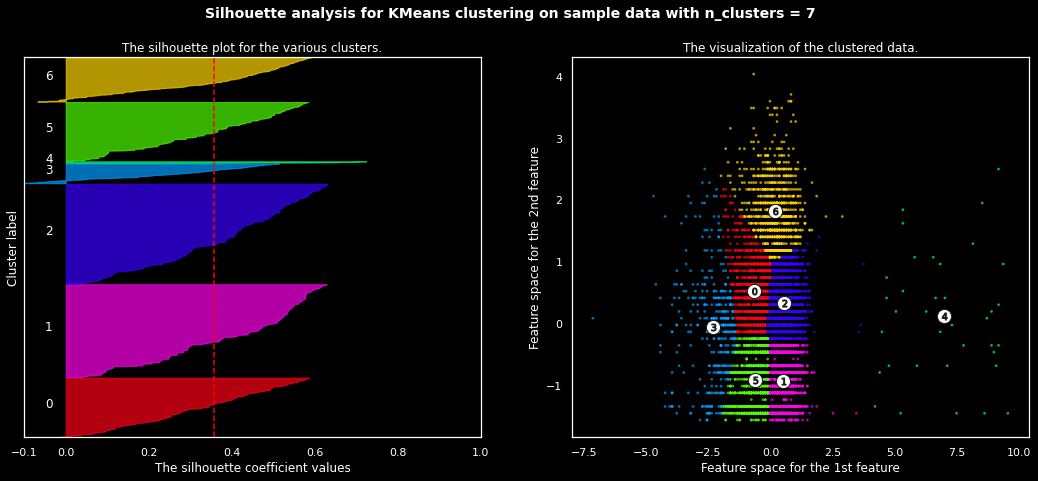

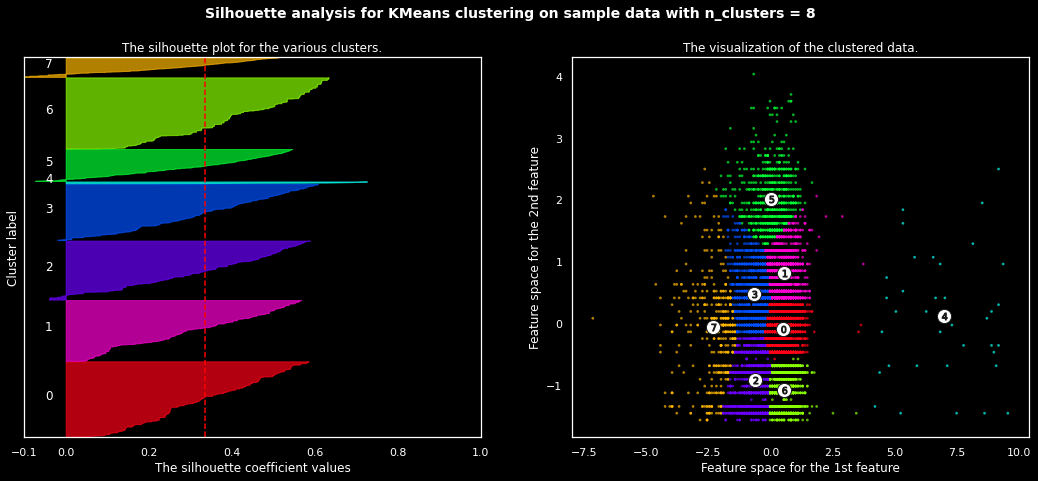

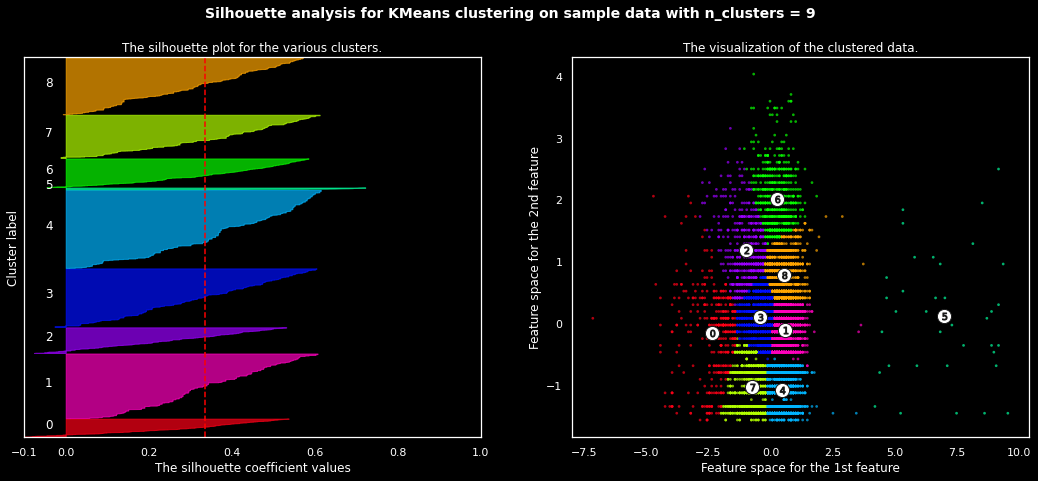

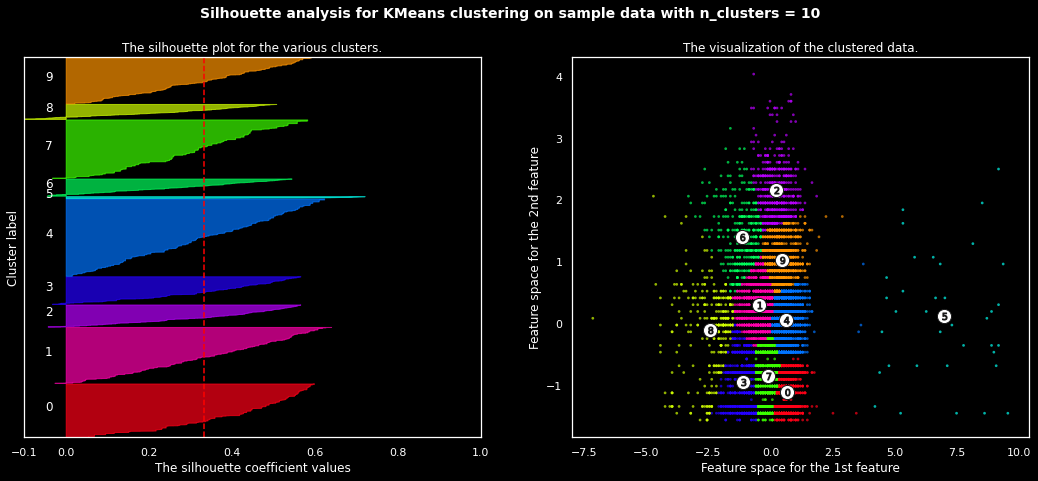

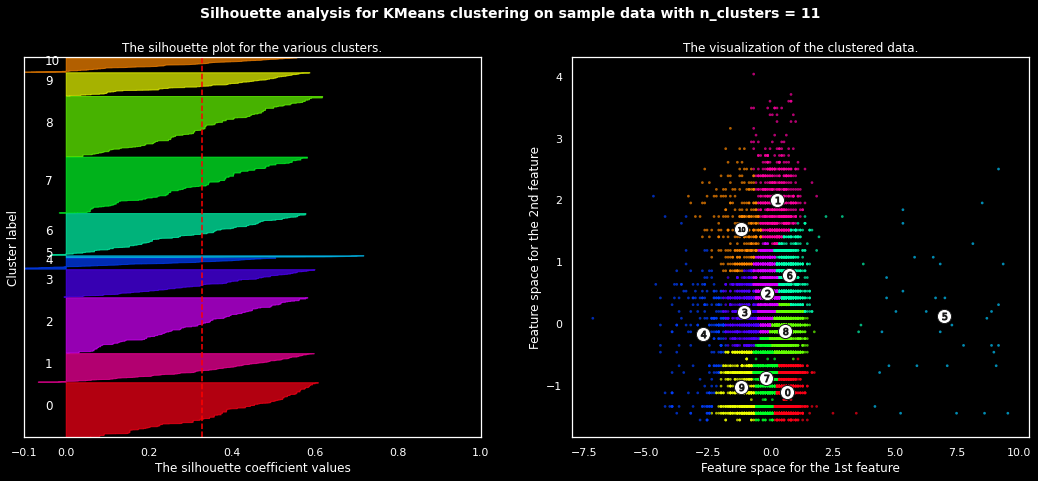

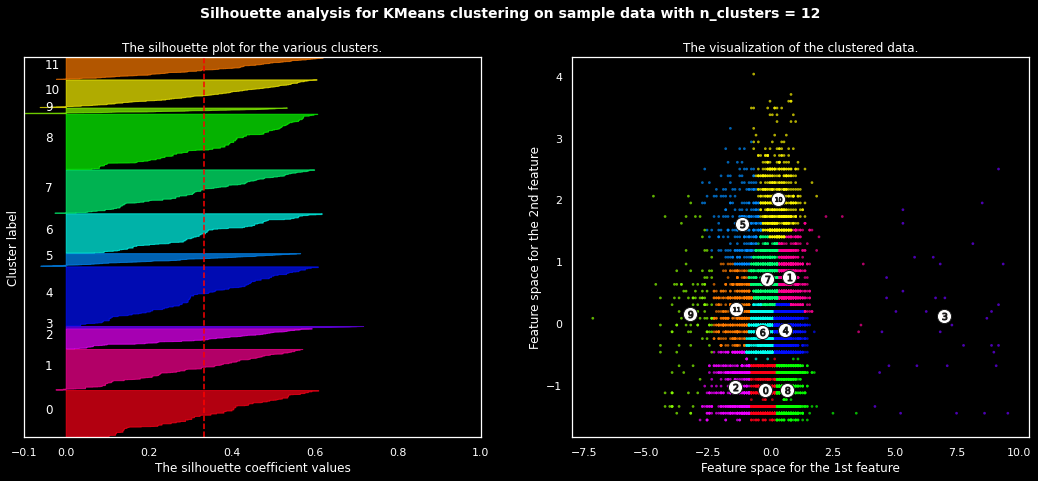

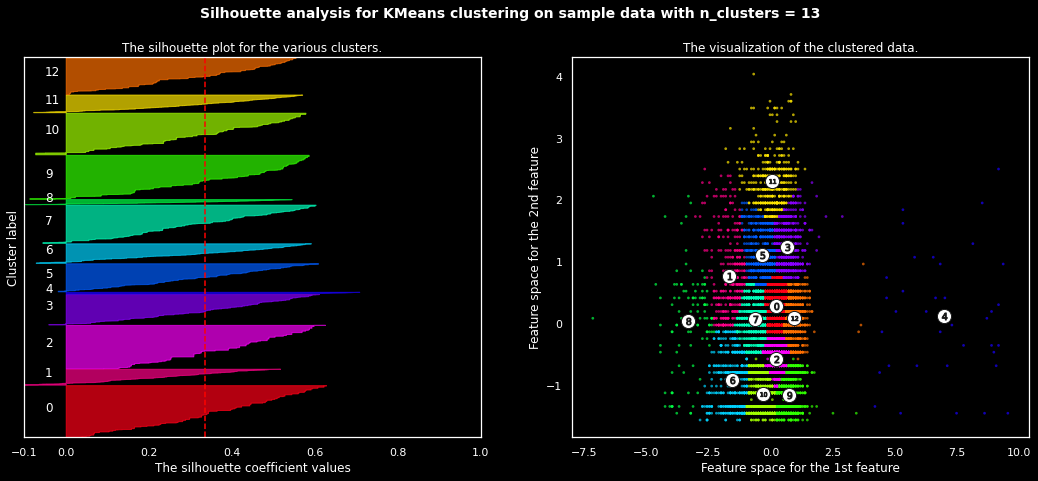

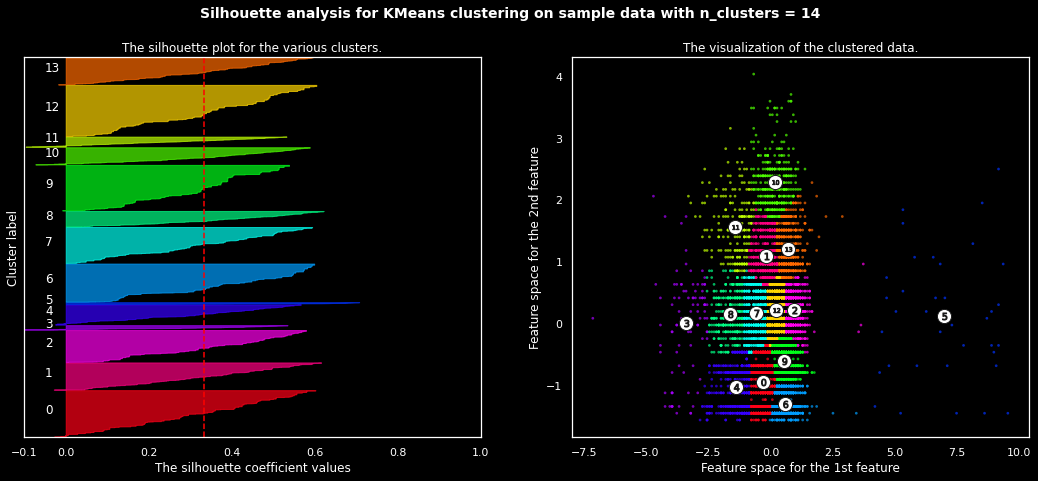

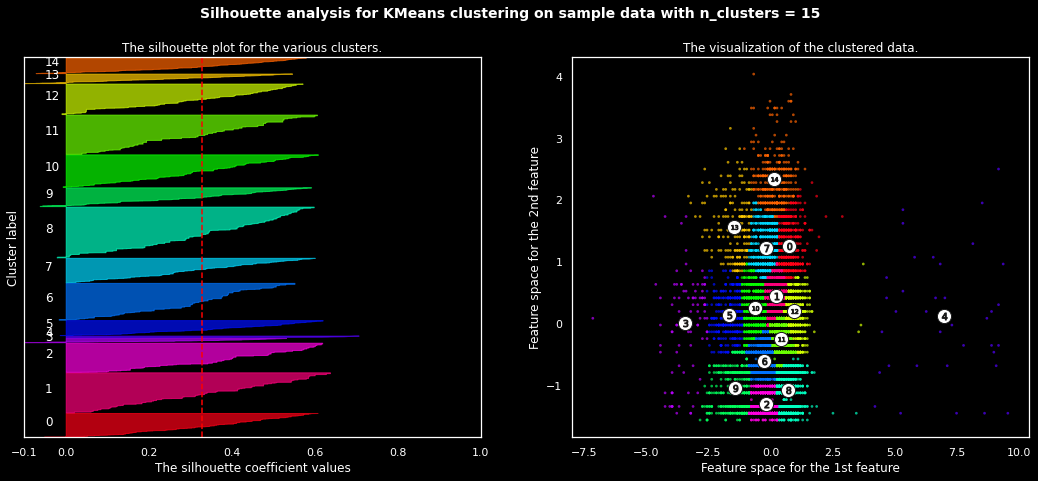

In [114]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## **Elbow Method**


---




The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

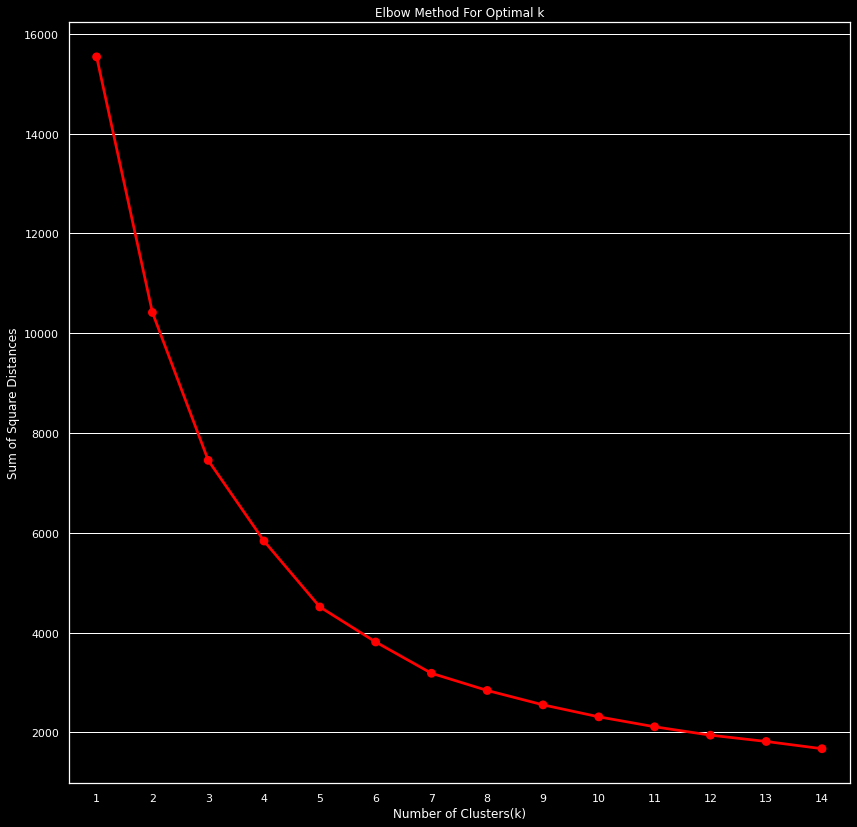

In [115]:
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* We will use 5 clusters.We can see from the above graph that 5 is the elbow point 

In [116]:
kmeans = KMeans(n_clusters = 5 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

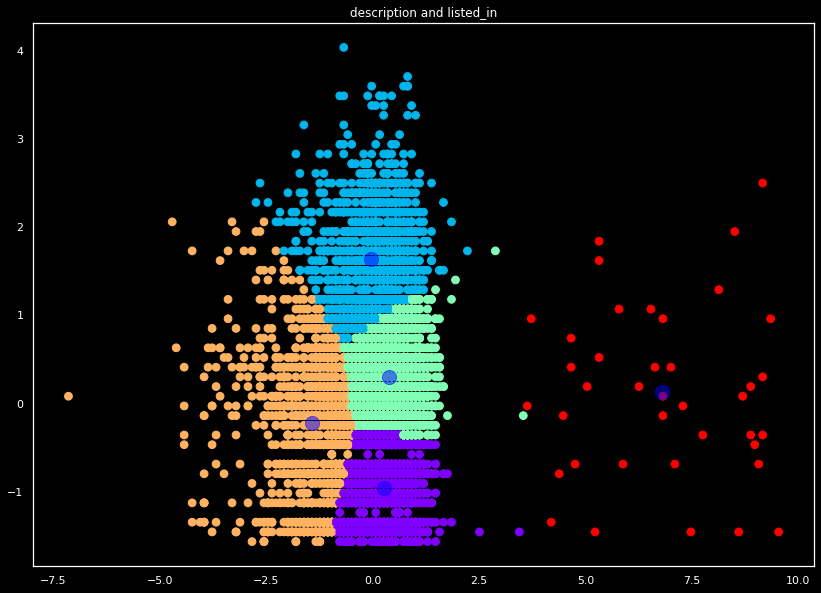

In [117]:
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
plt.grid(b=None)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

# **DBSCAN**


---





DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

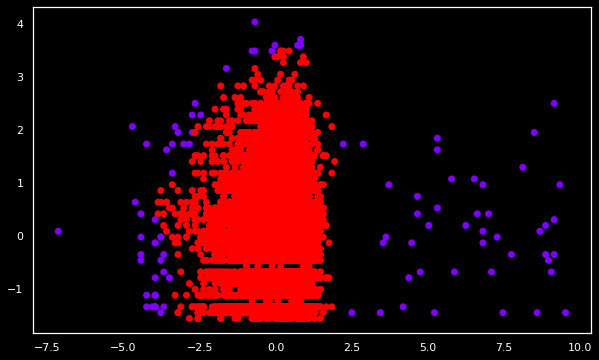

In [118]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.grid(b=None)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# **HIERARCHICAL CLUSTERING**


---





Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.

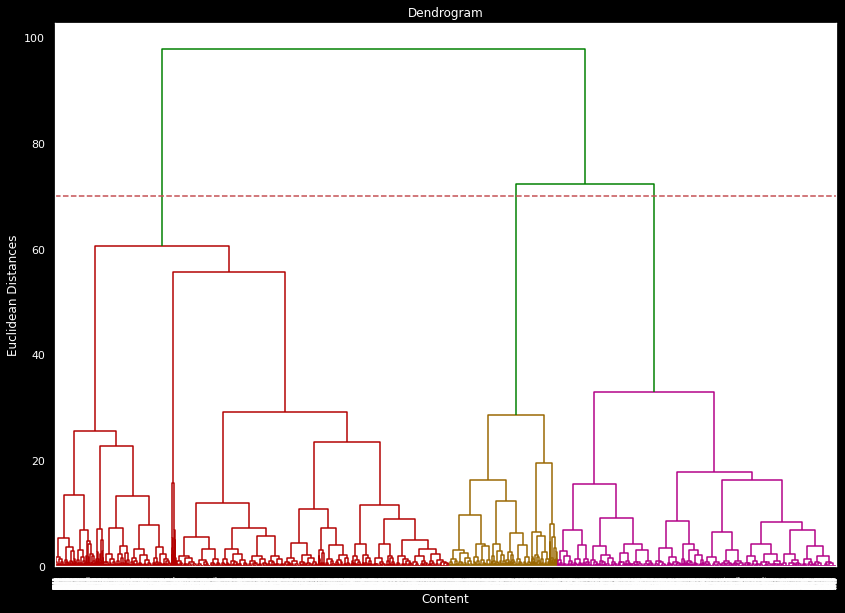

In [119]:
 #  importing sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(14,10))
plt.style.use('dark_background')

sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
 # find largest vertical distance we can make without crossing any other horizontal line
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() 

* From above dendrogram we will take 3 clusters.

### **Agglomerative Clustering:** Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters.

In [120]:
#import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

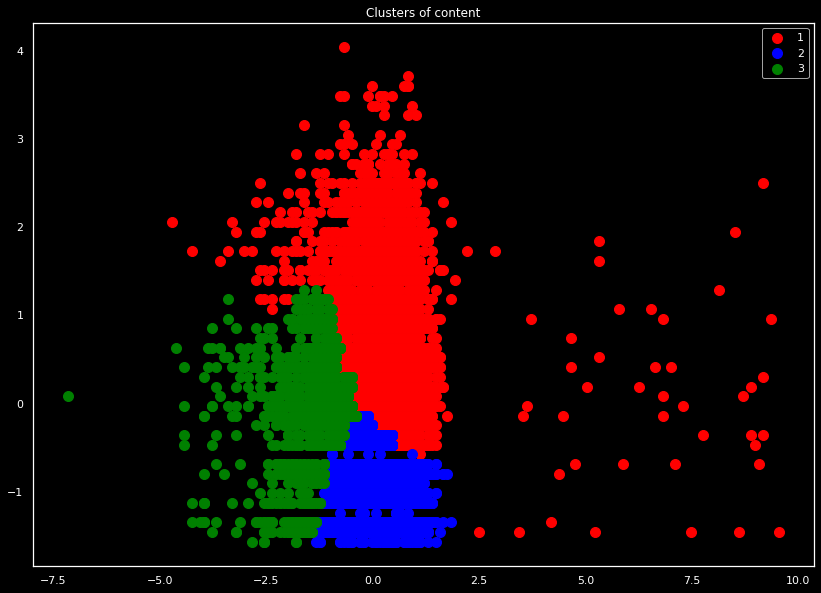

In [121]:
# Visualizing the clusters
plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')
plt.grid(b=None)

plt.title('Clusters of content')

plt.legend()
plt.show()

# **PCA(PRINCIPAL COMPONENT ANALYSIS)**


---




Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

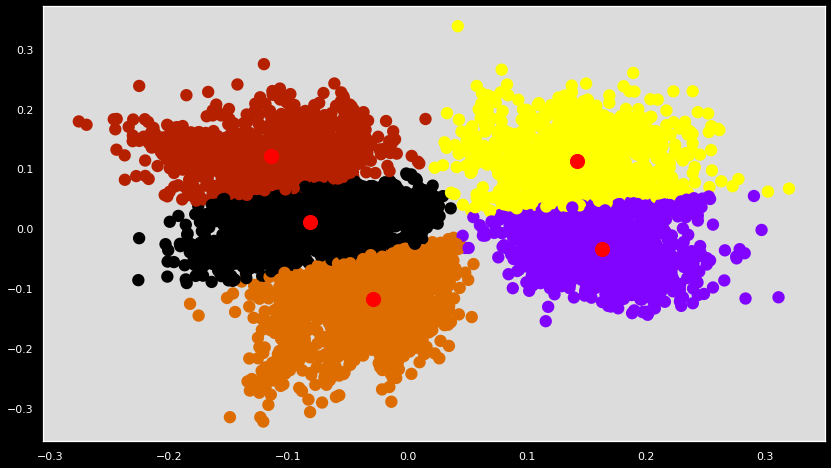

In [122]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA
from matplotlib import rcParams
pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc.toarray())
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(14,8))

rcParams['axes.facecolor'] = 'gainsboro'
rcParams["figure.facecolor"] = 'black'
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=40, cmap='gnuplot',linewidths=6)

plt.grid(b=None)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=200, alpha=1);


In [123]:
#Predicting the clusters and evaluating the silhouette score
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))

Silhouette score is 0.42211911474271896


In [124]:
#Function for getting the most common words in each cluster
def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs = []
    for label in labels:
      # indices for each cluster
      id_temp = np.where(y_pred==label)
      # returns average score across cluster 
      x_means = np.mean(vc_arr[id_temp], axis = 0) 
      # indices with top 20 scores
      sorted_means = np.argsort(x_means)[::-1][:n_feats] 
      features = vectorizer.get_feature_names()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



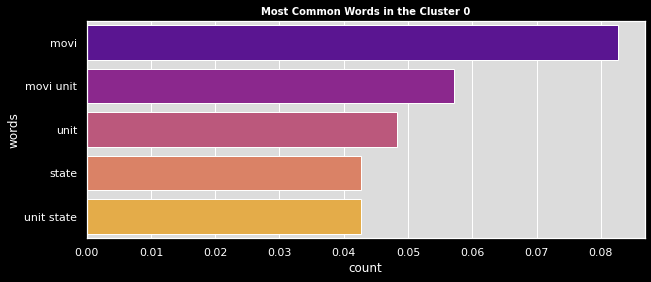

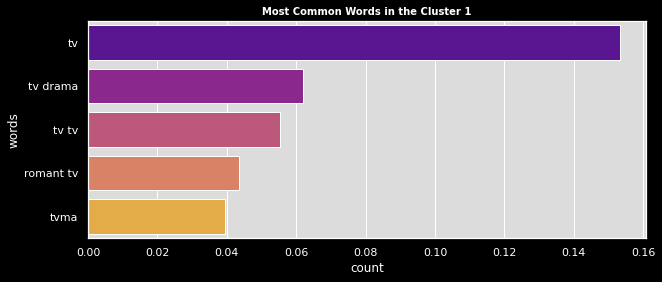

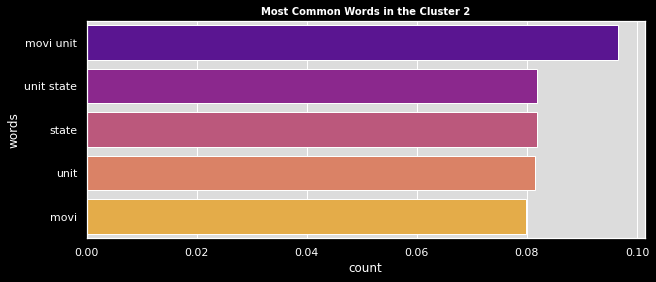

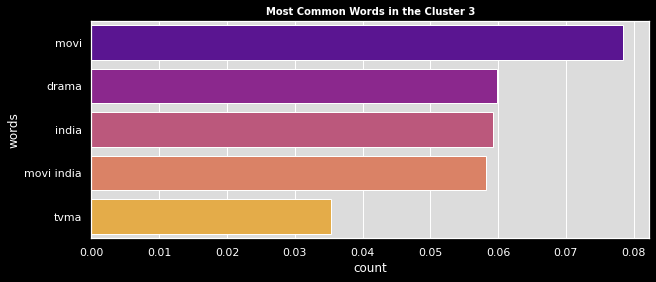

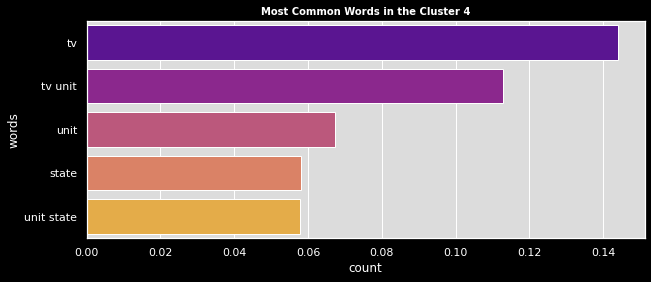

In [125]:
#Function for data visualization of the most commin words in each cluster
def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(10, 4))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'plasma')

dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)

In [126]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: aamir aamir khan
Cluster 1: aamir aamir khan
Cluster 2: aamir khan aamir
Cluster 3: aamir khan aamir
Cluster 4: aamir khan aamir
Cluster 5: aamir aamir khan
Cluster 6: aamir aamir khan
Cluster 7: aamir khan aamir
Cluster 8: aamir aamir khan
Cluster 9: aamir aamir khan
Cluster 10: aamir aamir khan
Cluster 11: aamir khan aamir
Cluster 12: aamir khan aamir
Cluster 13: aamir aamir khan
Cluster 14: aamir khan aamir
Cluster 15: aamir aamir khan
Cluster 16: aamir khan aamir
Cluster 17: aamir khan aamir
Cluster 18: aamir khan aamir
Cluster 19: aamir khan aamir
Cluster 20: aamir khan aamir
Cluster 21: aamir aamir khan
Cluster 22: aamir aamir khan
Cluster 23: aamir khan aamir
Cluster 24: aamir aamir khan
Cluster 25: aamir aamir khan
Cluster 26: aamir aamir khan
Cluster 27: aamir khan aamir
Cluster 28: aamir aamir khan
Cluster 29: aamir khan aamir
Cluster 30: aamir khan aamir
Cluster 31: aamir khan aamir
Cluster 32: aamir khan aamir
Cluster 33: aamir khan aamir
Cluster 34: aamir khan a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [127]:
netflix_df['cluster'] = kmeans.labels_
netflix_df.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

  date_added  release_year rating  duration  ... international  \
0 2020-08-14          2020  TV-MA         4  ...          True   
1 2016-12-23          2016  TV-MA        93  ...          True   
2 2018-12-20          2011      R        78  ...          True   
3 2017-11-16          2009  PG-13        80  ...         False   
4 2020-01-01          2008  PG-13       123  ...         False   

                                           cast_name     country_list  \
0  [João Miguel,  Bianca Comparato,  Michel Gomes...         [Brazil]   
1  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...         [Mexico]   
2  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...      [Singapore]   
3  [Elijah Wood,  John C. Reilly,  Jennifer Conne...  [United States]   
4  [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...  [United States]   

                                  combined_text_feat  \
0  tv drama tv scifi fantasi futur elit inhabit i...   
1  drama devast earthquak hit meico citi trap sur...   
2  horror movi armi recruit found dead fellow sol...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

  Length(listed_in) Cluster Label  cluster  
0                25             2        1  
1                 5            13        3  
2                11            10        0  
3                43            34        0  
4                 5            26        0  

[5 rows x 23 columns]

In [128]:
#Function for getting the some of the same cluster item details
def find_same_cluster_items(name_nf):
  inp_nf = netflix_df.loc[netflix_df['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = netflix_df.loc[(netflix_df['cluster'] == num) & (netflix_df['type']==type_nf)]
  temp_df = temp_df.sample(10)
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
  return list(temp_df['title'])

In [129]:
find_same_cluster_items('zodiac')

The cluster number is 0


['A Life of Speed: The Juan Manuel Fangio Story',
 'The Christmas Candle',
 'Elstree 1976',
 "Pinkfong & Baby Shark's Space Adventure",
 'Elles ont toutes une histoire',
 'I Will Follow',
 'Blurred Lines: Inside the Art World',
 'Teenage Cocktail',
 'Ravenous',
 'Yes Man']

In [130]:
find_same_cluster_items('Dear Zindagi')

The cluster number is 3


['Swearnet: The Movie',
 'Joy',
 'Our House',
 'Battle',
 'FullMetal Alchemist',
 'Paathi',
 'Pagpag: Nine Lives',
 'Love Is a Story',
 'Jo Pil-ho: The Dawning Rage',
 'Happy New Year']

# **Recommendation System**


---



A recommender system, or a recommendation system, is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item. They are primarily used in commercial applications.The famous The Netflix Prize is also a competition in the context of recommendation systems.

In [131]:
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix 
cosine_sim= linear_kernel(X_vc,X_vc)

In [132]:
#Series for getting the index and title
indices = pd.Series(netflix_df.index,index=netflix_df['title']).drop_duplicates()

In [133]:
def get_recommendations(title, cosine_sim = cosine_sim):

    #get index of the matching title
    idx=indices[title]

    #get the similarity score of the similar titles
    sim_scores=list(enumerate(cosine_sim[idx]))

    #sort the movies based on the similarity score
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)

    #get the similarity score of top 10 movies
    sim_scores=sim_scores[1:11]

    #get the indices 
    movie_indices = [i[0] for i in sim_scores]
    
    #return the top indices
    return netflix_df['title'].iloc[movie_indices]

In [134]:
get_recommendations('Dear Zindagi')

5197                Ricardo Quevedo: Hay gente así
497                      An Unremarkable Christmas
3795                              Loving is Losing
5595    Si saben cómo me pongo ¿pá qué me invitan?
4853                                   Pickpockets
4818                                  Penalty Kick
5386                                  Santo Cachón
2147                              Feo pero sabroso
375          Alejandro Riaño: Especial de stand up
1740                            Dhoondte Reh Jaoge
Name: title, dtype: object

# **CONCLUSION**
---


1. The dataset contains 7787 rows and 12 columns, cast and director columns have a lot of missing values so we dropped them and we have 10 features for the further analysis.

2. Netflix has 69% of its content as movies, so we can say that movies are clearly more popular on Netflix than TV shows.Netflix has more movies than TV Shows

3. United States provides the most number of movies and shows followed by India and United Kingdom.

4. TV-MA rated content is maximum in number in the dataset. This rating indicates that the content is for mature and adult audience above the age of 17.

5. There is an exponential raise in the number of TV shows and movies distributed by Netflix in the recent years.

6. Text cleaning and vectorization was done on the combined features of the dataset which includes origin country, leading cast member, rating type, content type and description for clustering analysis.

7. Optimal number of clusters were found out to be 5 with silhouette coefficient value of 0.3629

8. Principal component analysis was performed inorder to reduce the higher dimensionality which improved the silhouette coefficient to 0.42. Even though there's improvement in the silhouette score, these cannot be compared as these are two different method of preprocessing is involved.

9. Clusters are identified for each of the record in the dataset.

10. Recommendation based on cosine similiarity is also done on the same transformed data.